In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#outcomes
outcomes=pd.read_csv("../Cholesterol_Data/ANOVA_relevantChols_quantilenormed.csv",sep="\t")
outcomes=outcomes.rename(columns={"Unnamed: 0":"AETID"})
outcomes=outcomes.set_index("AETID",inplace=False)
outcomes

Campestanol µg/dl  Campesterol mg/dl  Sitostanol µg/dl  \
AETID                                                             
AET0044          41.458895          46.468789         39.662632   
AET0380          67.878579          76.027737         64.537474   
AET0027          44.008684          46.043947         42.802895   
AET0049          61.334053          56.392579         59.671632   
AET0006          34.404368          35.503211         43.591789   
...                    ...                ...               ...   
AET0021          31.469053          39.662632         25.072000   
AET0071          35.148421          38.095684         30.366684   
AET0138          36.000789          31.469053         43.286526   
AET0111          86.392263          58.947947         86.392263   
AET0390          38.095684          37.188421         46.848474   

         Sitosterol mg/dl  Stigmasterol µg/dl  
AETID                                          
AET0044         44.501789           42.482474  
AET0380         65.386895           52.602526  
AET0027         47.678211           55.210053  
AET0049         56.745526           66.070737  
AET0006         41.326737           39.177263  
...                   ...                 ...  
AET0021         31.725579           35.503211  
AET0071         36.000789           33.430000  
AET0138         34.619421           35.148421  
AET0111         86.392263           76.027737  
AET0390         38.796263           47.913737  

[106 rows x 5 columns]

In [3]:
#CADD13 mechanism features
CADD13_mechanisms_scores=pd.read_csv("../Input_for_Models/CADD13_mechanisms_scores_processed.csv")
CADD13_mechanisms_scores=CADD13_mechanisms_scores.rename(columns={"Sample":"AETID"})
CADD13_mechanisms_scores=CADD13_mechanisms_scores.set_index("AETID",inplace=False)
CADD13_mechanisms_scores
samples=list(CADD13_mechanisms_scores.index)

In [4]:
CADD13_mechanisms_scores

MAPK subgraph  Calcium-dependent signal transduction  \
AETID                                                           
AET0044       0.000009                               0.000028   
AET0380       0.000009                               0.000028   
AET0027       0.000060                               0.000062   
AET0049       0.000009                               0.000041   
AET0006       0.000060                               0.000079   
...                ...                                    ...   
AET0021       0.000060                               0.000060   
AET0071       0.000009                               0.000048   
AET0138       0.000070                               0.000107   
AET0111       0.000009                               0.000048   
AET0390       0.000009                               0.000043   

         Synuclein subgraph  Notch signaling subgraph  Ubiquitin subgraph  \
AETID                                                                       
AET0044            0.002736                  0.001473            0.000096   
AET0380            0.001414                  0.000009            0.000048   
AET0027            0.001408                  0.000060            0.000096   
AET0049            0.001481                  0.000009            0.000096   
AET0006            0.003162                  0.001524            0.000000   
...                     ...                       ...                 ...   
AET0021            0.000651                  0.000060            0.000096   
AET0071            0.001186                  0.000009            0.000096   
AET0138            0.001429                  0.000070            0.000096   
AET0111            0.002649                  0.001466            0.000096   
AET0390            0.001128                  0.000009            0.000048   

         Chaperone subgraph  Caspase subgraph  \
AETID                                           
AET0044            0.001167          0.001273   
AET0380            0.001356          0.001414   
AET0027            0.000980          0.001136   
AET0049            0.001375          0.001481   
AET0006            0.001638          0.001698   
...                     ...               ...   
AET0021            0.000494          0.000651   
AET0071            0.001080          0.001186   
AET0138            0.001262          0.001429   
AET0111            0.001087          0.001192   
AET0390            0.001070          0.001128   

         Reactive oxygen species subgraph  Mitochondrial subgraph  \
AETID                                                               
AET0044                          0.001187                0.001249   
AET0380                          0.001376                0.001510   
AET0027                          0.000982                0.001112   
AET0049                          0.001407                0.001529   
AET0006                          0.001657                0.001698   
...                                   ...                     ...   
AET0021                          0.000494                0.000554   
AET0071                          0.001119                0.001234   
AET0138                          0.001299                0.001405   
AET0111                          0.001125                0.001096   
AET0390                          0.001104                0.001079   

         Mitophagy subgraph  ...  Innate immune system subgraph  \
AETID                        ...                                  
AET0044            0.000009  ...                       0.001463   
AET0380            0.000009  ...                       0.000000   
AET0027            0.000060  ...                       0.000000   
AET0049            0.000009  ...                       0.000000   
AET0006            0.000060  ...                       0.001463   
...                     ...  ...                            ...   
AET0021            0.000060  ...                       0.000000   
AET0071            0.0

In [5]:
#clinical data / confounder
confounder=pd.read_csv("../Clinical_Data/Counfounder6_scaled_input_intercept_headers.csv")
confounder=confounder.set_index("AETID",inplace=False)
confounder=confounder.drop(["intercept"],axis=1)
confounder

Age  Smoking  Alcohol  Sex  Levodopa  Group_IPD
AETID                                                        
AET0044  0.062505      0.0      2.0    1         0          0
AET0380  0.890703      1.0      1.0    0         1          0
AET0027 -2.185458      0.0      1.0    1         0          0
AET0049  1.009017      0.0      2.0    1         0          1
AET0006  0.890703      1.0      2.0    0         1          1
...           ...      ...      ...  ...       ...        ...
AET0021 -0.292436      1.0      2.0    1         0          0
AET0071  0.417447      0.0      3.0    0         0          1
AET0138  0.417447      0.0      2.0    1         0          1
AET0111  0.180819      1.0      5.0    1         0          0
AET0390  0.535761      1.0      1.0    0         0          0

[106 rows x 6 columns]

In [6]:
#merge them 
data = pd.concat([outcomes,CADD13_mechanisms_scores,confounder], axis=1, sort=False)

In [7]:
###################################################################################

In [8]:
# examine scores between the groups 
CADD13_mechs_groups=pd.concat([CADD13_mechanisms_scores,confounder],axis=1,sort=False)

In [9]:
CADD13_mechs_groups=CADD13_mechs_groups.drop(["Age","Smoking","Alcohol","Sex","Levodopa"],axis=1)

In [13]:
mechs_control = CADD13_mechs_groups.loc[CADD13_mechs_groups['Group_IPD'] == 0]
mechs_sick =  CADD13_mechs_groups.loc[CADD13_mechs_groups['Group_IPD'] == 1]

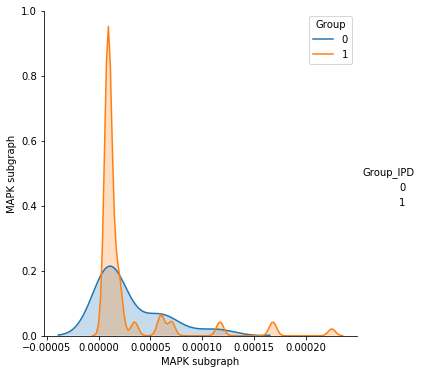

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


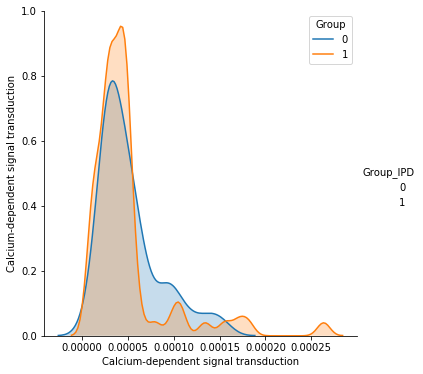

Ks_2sampResult(statistic=0.09146574818216609, pvalue=0.9687042400939759)


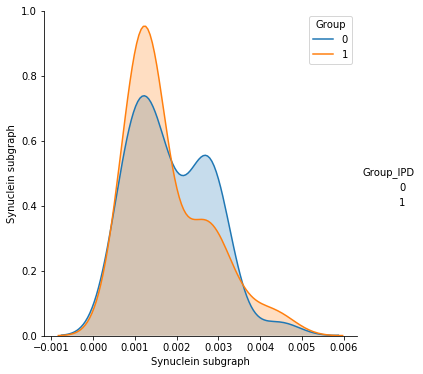

Ks_2sampResult(statistic=0.11595866819747416, pvalue=0.8462065339345702)


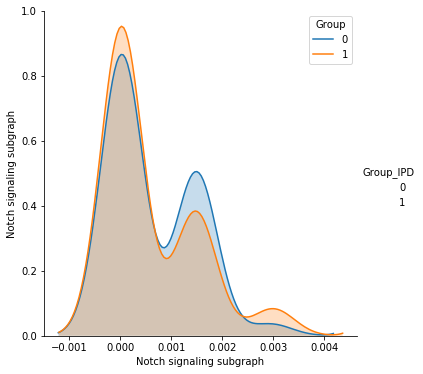

Ks_2sampResult(statistic=0.1377726750861079, pvalue=0.6736137993359828)


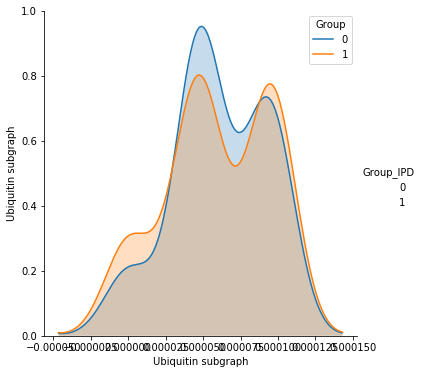

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


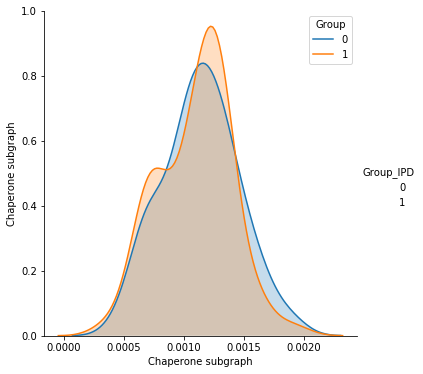

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


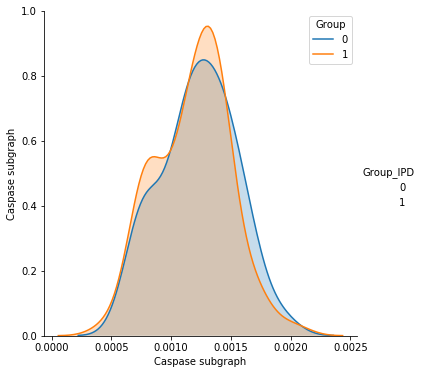

Ks_2sampResult(statistic=0.11021814006888633, pvalue=0.8826521915064645)


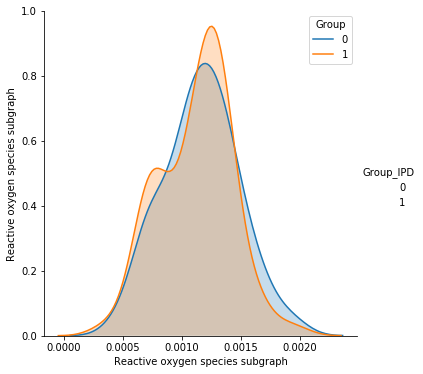

Ks_2sampResult(statistic=0.10600841944125526, pvalue=0.907591672336959)


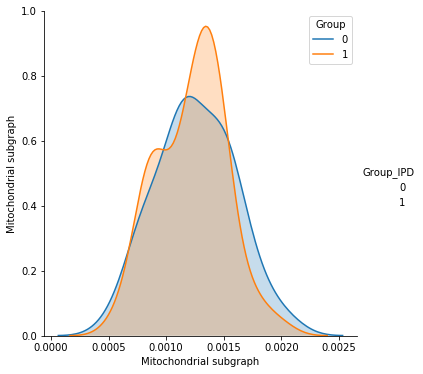

Ks_2sampResult(statistic=0.09529276693455797, pvalue=0.9563830473174161)


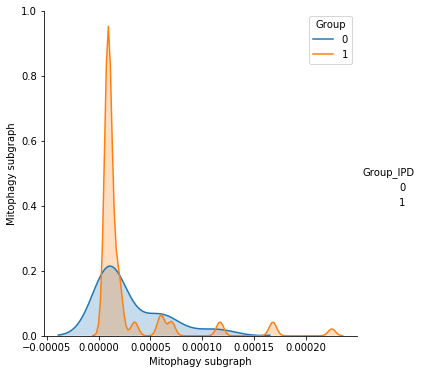

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


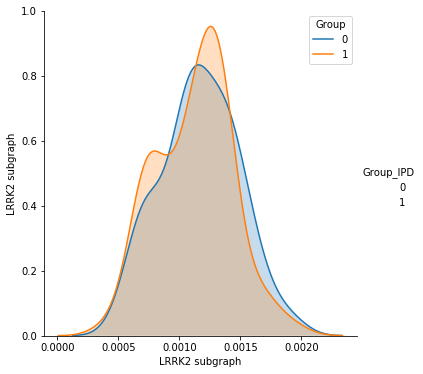

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


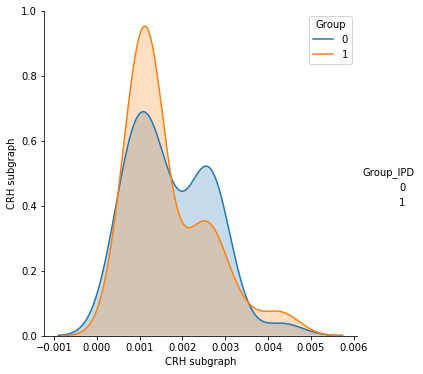

Ks_2sampResult(statistic=0.14580941446613088, pvalue=0.6075883185287074)


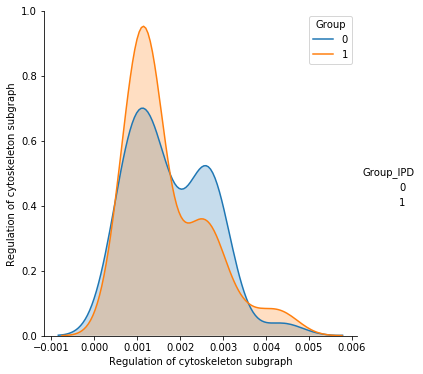

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


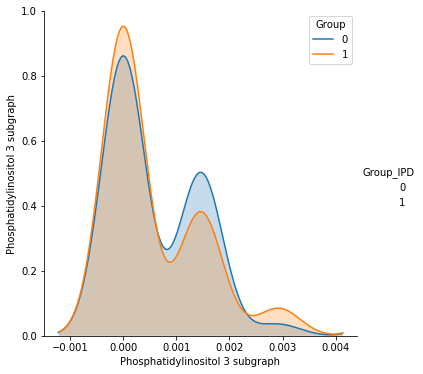

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


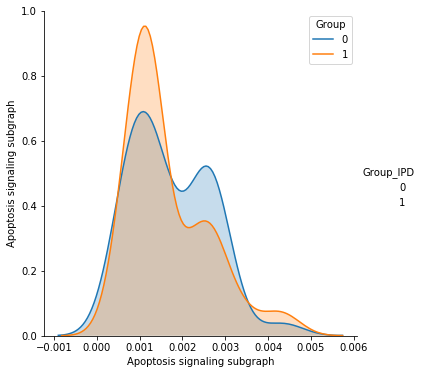

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


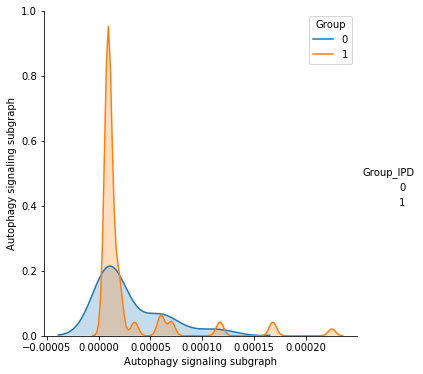

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


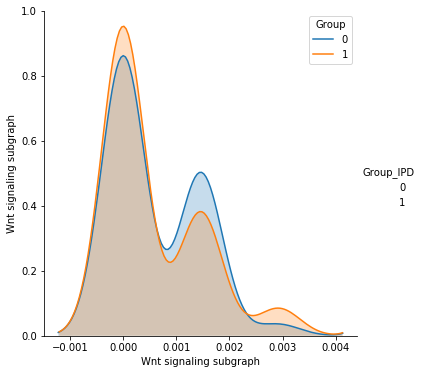

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


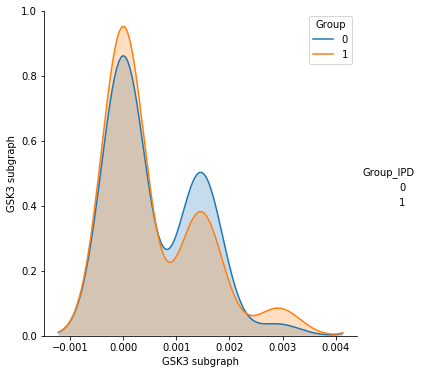

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


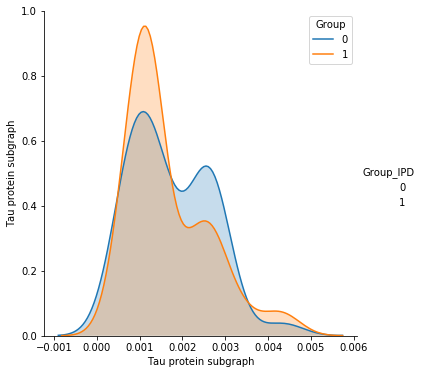

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


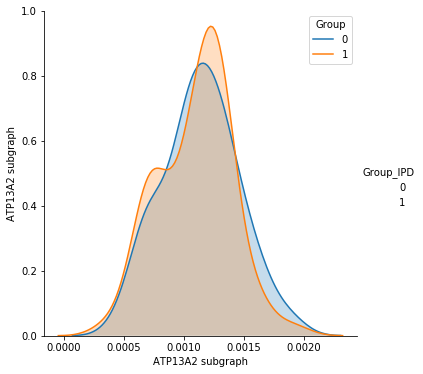

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


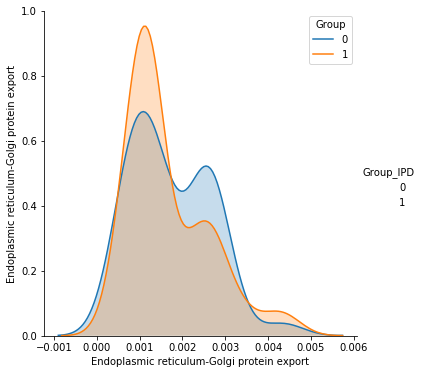

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


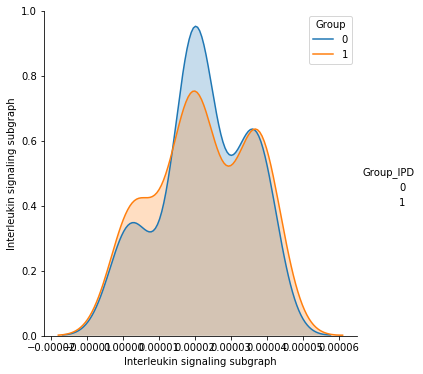

Ks_2sampResult(statistic=0.10830463069269039, pvalue=0.8951052522732157)


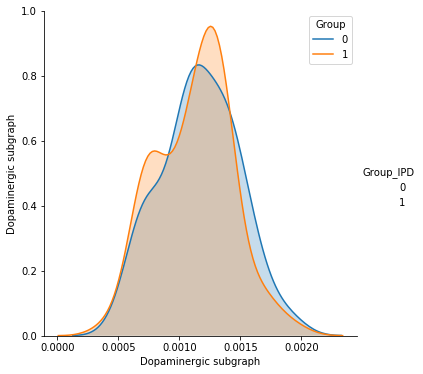

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


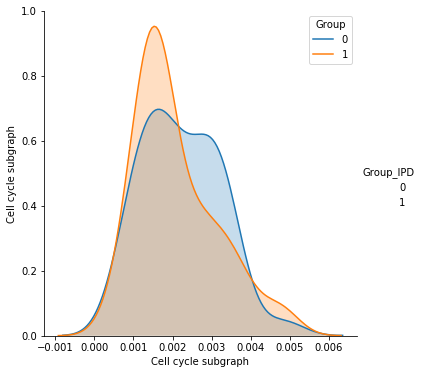

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


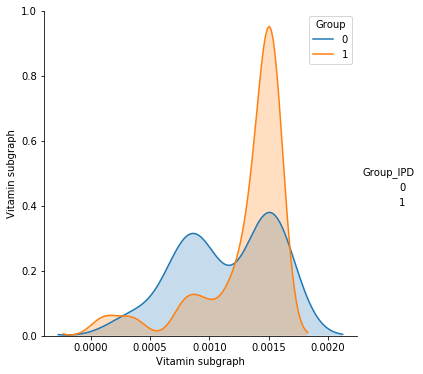

Ks_2sampResult(statistic=0.3038652889399158, pvalue=0.016093748309058298)


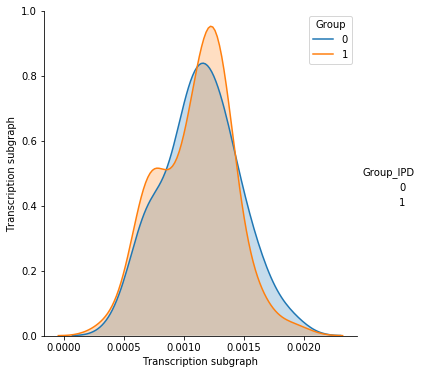

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


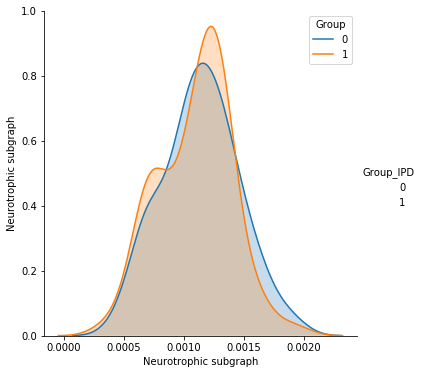

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


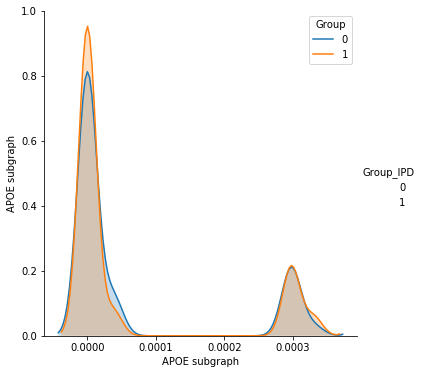

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


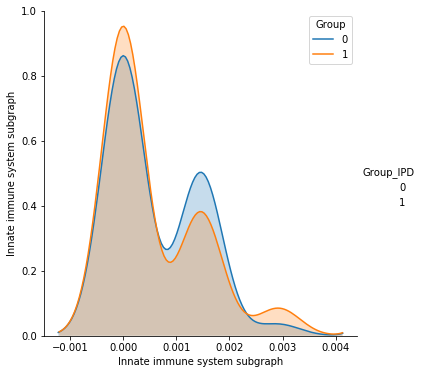

Ks_2sampResult(statistic=0.0876387294297742, pvalue=0.9790192770062475)


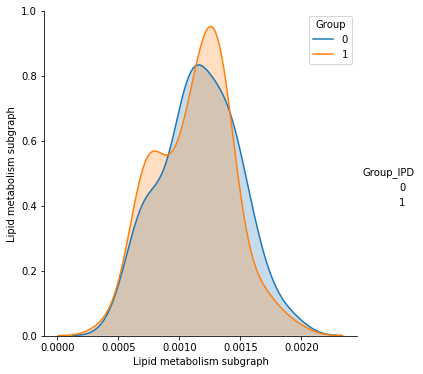

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


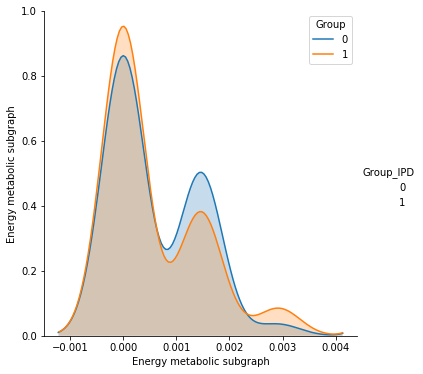

Ks_2sampResult(statistic=0.07577497129735936, pvalue=0.995654746247484)


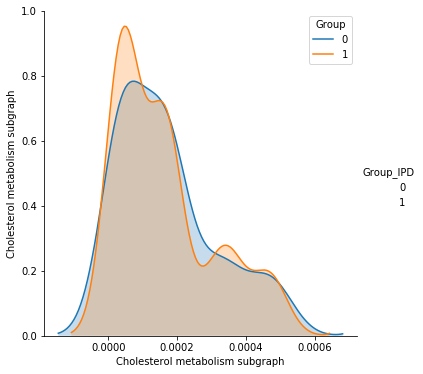

Ks_2sampResult(statistic=0.06926903941829315, pvalue=0.9986949601507721)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


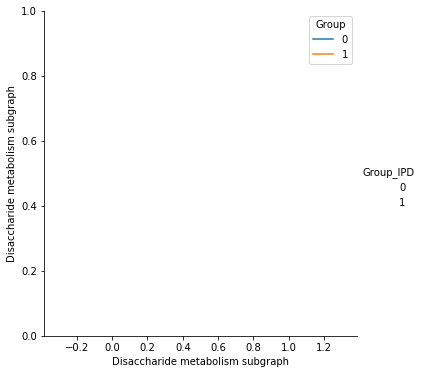

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


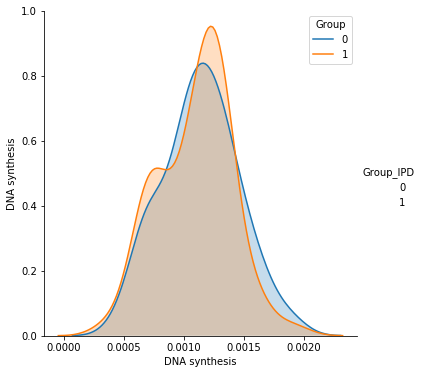

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


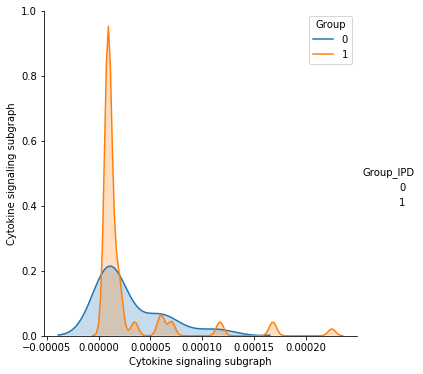

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


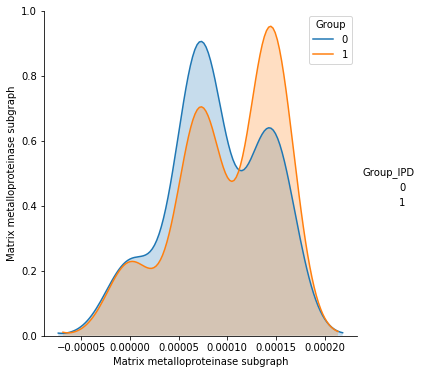

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


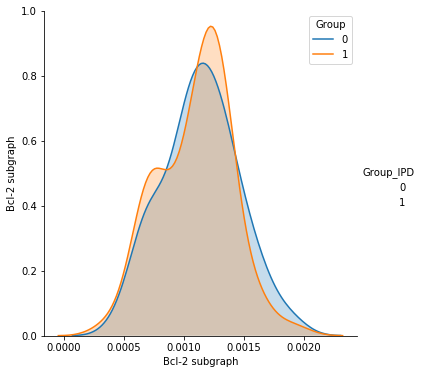

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


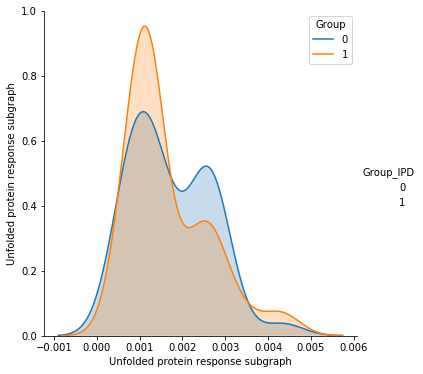

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


In [62]:
#plot
from scipy import stats

plt.rcParams.update({'figure.max_open_warning': 0})
for col in CADD13_mechs_groups.columns:
    if col!="Group_IPD":
        sns.pairplot(CADD13_mechs_groups[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        plt.legend(title='Group')
        plt.show()
        ks_test=stats.ks_2samp(mechs_control[col],mechs_sick[col])
        print (ks_test)

In [10]:
CADD13_mechs_groups

MAPK subgraph  Calcium-dependent signal transduction  \
AETID                                                           
AET0044       0.000009                               0.000028   
AET0380       0.000009                               0.000028   
AET0027       0.000060                               0.000062   
AET0049       0.000009                               0.000041   
AET0006       0.000060                               0.000079   
...                ...                                    ...   
AET0021       0.000060                               0.000060   
AET0071       0.000009                               0.000048   
AET0138       0.000070                               0.000107   
AET0111       0.000009                               0.000048   
AET0390       0.000009                               0.000043   

         Synuclein subgraph  Notch signaling subgraph  Ubiquitin subgraph  \
AETID                                                                       
AET0044            0.002736                  0.001473            0.000096   
AET0380            0.001414                  0.000009            0.000048   
AET0027            0.001408                  0.000060            0.000096   
AET0049            0.001481                  0.000009            0.000096   
AET0006            0.003162                  0.001524            0.000000   
...                     ...                       ...                 ...   
AET0021            0.000651                  0.000060            0.000096   
AET0071            0.001186                  0.000009            0.000096   
AET0138            0.001429                  0.000070            0.000096   
AET0111            0.002649                  0.001466            0.000096   
AET0390            0.001128                  0.000009            0.000048   

         Chaperone subgraph  Caspase subgraph  \
AETID                                           
AET0044            0.001167          0.001273   
AET0380            0.001356          0.001414   
AET0027            0.000980          0.001136   
AET0049            0.001375          0.001481   
AET0006            0.001638          0.001698   
...                     ...               ...   
AET0021            0.000494          0.000651   
AET0071            0.001080          0.001186   
AET0138            0.001262          0.001429   
AET0111            0.001087          0.001192   
AET0390            0.001070          0.001128   

         Reactive oxygen species subgraph  Mitochondrial subgraph  \
AETID                                                               
AET0044                          0.001187                0.001249   
AET0380                          0.001376                0.001510   
AET0027                          0.000982                0.001112   
AET0049                          0.001407                0.001529   
AET0006                          0.001657                0.001698   
...                                   ...                     ...   
AET0021                          0.000494                0.000554   
AET0071                          0.001119                0.001234   
AET0138                          0.001299                0.001405   
AET0111                          0.001125                0.001096   
AET0390                          0.001104                0.001079   

         Mitophagy subgraph  ...  Lipid metabolism subgraph  \
AETID                        ...                              
AET0044            0.000009  ...                   0.001176   
AET0380            0.000009  ...                   0.001365   
AET0027            0.000060  ...                   0.001040   
AET0049            0.000009  ...                   0.001384   
AET0006            0.000060  ...                   0.001698   
...                     ...  ...                        ...   
AET0021            0.000060  ...                   0.000554   
AET0071            0.000009  ...                   0.00108

In [7]:
data_chols_mechs=pd.concat([outcomes,CADD13_mechanisms_scores])

In [16]:
outcomes.corrwith(CADD13_mechanisms_scores)

APOE subgraph                                NaN
ATP13A2 subgraph                             NaN
Apoptosis signaling subgraph                 NaN
Autophagy signaling subgraph                 NaN
Bcl-2 subgraph                               NaN
CRH subgraph                                 NaN
Calcium-dependent signal transduction        NaN
Campestanol µg/dl                            NaN
Campesterol mg/dl                            NaN
Caspase subgraph                             NaN
Cell cycle subgraph                          NaN
Chaperone subgraph                           NaN
Cholesterol metabolism subgraph              NaN
Cytokine signaling subgraph                  NaN
DNA synthesis                                NaN
Disaccharide metabolism subgraph             NaN
Dopaminergic subgraph                        NaN
Endoplasmic reticulum-Golgi protein export   NaN
Energy metabolic subgraph                    NaN
GSK3 subgraph                                NaN
Innate immune system

In [7]:
data.to_csv("../Input_for_Models/Input_MANCOVA/chols_mechs_confs.csv",header=True,index=True)

In [ ]:
############################# CADD13 scaled ##########################

In [4]:
CADD13_mechanisms_scores_scaled=pd.read_csv("../Input_for_Models/CADD13_mechanisms_scores_scaled_processed.csv")
CADD13_mechanisms_scores_scaled=CADD13_mechanisms_scores_scaled.rename(columns={"Sample":"AETID"})
CADD13_mechanisms_scores_scaled=CADD13_mechanisms_scores_scaled.set_index("AETID",inplace=False)
CADD13_mechanisms_scores_scaled

MAPK subgraph  Calcium-dependent signal transduction  \
AETID                                                           
AET0044      -0.484502                              -0.534158   
AET0380      -0.484502                              -0.534318   
AET0027       0.848736                               0.308773   
AET0049      -0.484502                              -0.215579   
AET0006       0.848736                               0.733302   
...                ...                                    ...   
AET0021       0.848736                               0.254862   
AET0071      -0.484502                              -0.057455   
AET0138       1.112846                               1.408750   
AET0111      -0.484502                              -0.055879   
AET0390      -0.484502                              -0.163862   

         Synuclein subgraph  Notch signaling subgraph  Ubiquitin subgraph  \
AETID                                                                       
AET0044            0.976705                  1.018326            1.119721   
AET0380           -0.426211                 -0.703675           -0.361868   
AET0027           -0.431843                 -0.643592            1.119721   
AET0049           -0.355066                 -0.703675            1.119721   
AET0006            1.427964                  1.078409           -1.843460   
...                     ...                       ...                 ...   
AET0021           -1.235702                 -0.643592            1.119721   
AET0071           -0.668048                 -0.703675            1.119721   
AET0138           -0.410084                 -0.631690            1.119721   
AET0111            0.883870                  1.010261            1.119721   
AET0390           -0.729749                 -0.703675           -0.361868   

         Chaperone subgraph  Caspase subgraph  \
AETID                                           
AET0044            0.187927          0.246048   
AET0380            0.811301          0.709128   
AET0027           -0.431345         -0.203460   
AET0049            0.873608          0.929628   
AET0006            1.740171          1.644634   
...                     ...               ...   
AET0021           -2.032517         -1.799726   
AET0071           -0.099396         -0.040395   
AET0138            0.500829          0.759112   
AET0111           -0.078078         -0.019142   
AET0390           -0.132344         -0.231626   

         Reactive oxygen species subgraph  Mitochondrial subgraph  \
AETID                                                               
AET0044                          0.178072                0.047140   
AET0380                          0.801136                0.895818   
AET0027                         -0.497286               -0.396694   
AET0049                          0.905740                0.957150   
AET0006                          1.729598                1.505787   
...                                   ...                     ...   
AET0021                         -2.104876               -2.207872   
AET0071                         -0.045817               -0.000630   
AET0138                          0.547181                0.553729   
AET0111                         -0.024299               -0.449760   
AET0390                         -0.092880               -0.503178   

         Mitophagy subgraph  ...  Innate immune system subgraph  \
AETID                        ...                                  
AET0044           -0.484502  ...                       1.047654   
AET0380           -0.484502  ...                      -0.686753   
AET0027            0.848736  ...                      -0.686753   
AET0049           -0.484502  ...                      -0.686753   
AET0006            0.848736  ...                       1.047654   
...                     ...  ...                            ...   
AET0021            0.848736  ...                      -0.686753   
AET0071           -0.4

In [6]:
#merge them 
data_scaledCadd = pd.concat([outcomes,CADD13_mechanisms_scores_scaled,confounder], axis=1, sort=False)
data_scaledCadd.to_csv("../Input_for_Models/Input_MANCOVA/chols_mechsCADD_scaled_confs.csv",header=True,index=True)

In [ ]:
##################################################################################

In [17]:
# dann scores
dann_mechanism_scores=pd.read_csv("../Input_for_Models/dann_mechanisms_scores_processed.csv")
dann_mechanism_scores=dann_mechanism_scores.rename(columns={"Sample":"AETID"})
dann_mechanism_scores=dann_mechanism_scores.set_index("AETID",inplace=False)
dann_mechanism_scores

MAPK subgraph  Calcium-dependent signal transduction  \
AETID                                                           
AET0044       0.000025                               0.000079   
AET0380       0.000025                               0.000078   
AET0027       0.000177                               0.000182   
AET0049       0.000025                               0.000112   
AET0006       0.000177                               0.000231   
...                ...                                    ...   
AET0021       0.000177                               0.000177   
AET0071       0.000025                               0.000129   
AET0138       0.000216                               0.000317   
AET0111       0.000025                               0.000132   
AET0390       0.000025                               0.000119   

         Synuclein subgraph  Notch signaling subgraph  Ubiquitin subgraph  \
AETID                                                                       
AET0044            0.008420                  0.004693            0.000273   
AET0380            0.004493                  0.000025            0.000137   
AET0027            0.004198                  0.000177            0.000273   
AET0049            0.004479                  0.000025            0.000273   
AET0006            0.009923                  0.004844            0.000000   
...                     ...                       ...                 ...   
AET0021            0.001916                  0.000177            0.000273   
AET0071            0.003642                  0.000025            0.000273   
AET0138            0.004393                  0.000216            0.000273   
AET0111            0.008318                  0.004672            0.000273   
AET0390            0.003287                  0.000025            0.000137   

         Chaperone subgraph  Caspase subgraph  \
AETID                                           
AET0044            0.003454          0.003752   
AET0380            0.004331          0.004493   
AET0027            0.002911          0.003361   
AET0049            0.004180          0.004479   
AET0006            0.005079          0.005256   
...                     ...               ...   
AET0021            0.001466          0.001916   
AET0071            0.003343          0.003642   
AET0138            0.003904          0.004393   
AET0111            0.003373          0.003671   
AET0390            0.003125          0.003287   

         Reactive oxygen species subgraph  Mitochondrial subgraph  \
AETID                                                               
AET0044                          0.003508                0.003802   
AET0380                          0.004384                0.005003   
AET0027                          0.002916                0.003411   
AET0049                          0.004268                0.004852   
AET0006                          0.005133                0.005256   
...                                   ...                     ...   
AET0021                          0.001466                0.001642   
AET0071                          0.003447                0.004015   
AET0138                          0.004005                0.004443   
AET0111                          0.003479                0.003397   
AET0390                          0.003219                0.003150   

         Mitophagy subgraph  ...  Innate immune system subgraph  \
AETID                        ...                                  
AET0044            0.000025  ...                       0.004668   
AET0380            0.000025  ...                       0.000000   
AET0027            0.000177  ...                       0.000000   
AET0049            0.000025  ...                       0.000000   
AET0006            0.000177  ...                       0.004668   
...                     ...  ...                            ...   
AET0021            0.000177  ...                       0.000000   
AET0071            0.0

In [18]:
data_dann = pd.concat([outcomes,dann_mechanism_scores,confounder], axis=1, sort=False)

In [19]:
#examine difference between groups
dann_mechs_groups=pd.concat([dann_mechanism_scores,confounder],axis=1,sort=False)

In [20]:
dann_mechs_groups=dann_mechs_groups.drop(["Age","Smoking","Alcohol","Sex","Levodopa"],axis=1)

In [25]:
dannmechs_control = dann_mechs_groups.loc[dann_mechs_groups['Group_IPD'] == 0]
dannmechs_sick =  dann_mechs_groups.loc[dann_mechs_groups['Group_IPD'] == 1]

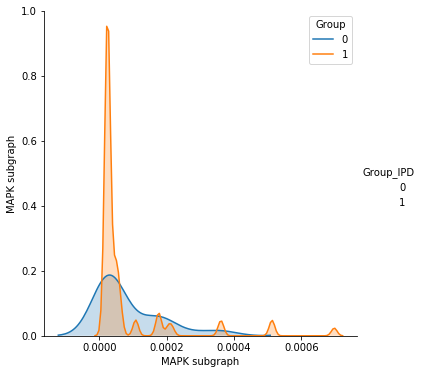

Ks_2sampResult(statistic=0.1584385763490241, pvalue=0.5045260653865571)


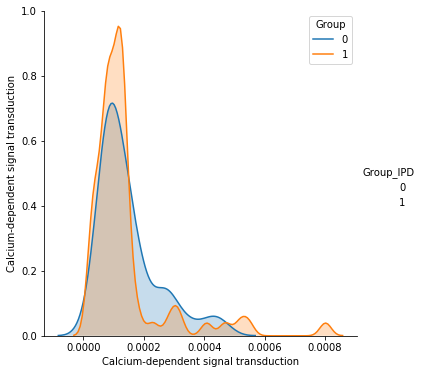

Ks_2sampResult(statistic=0.1821660926138538, pvalue=0.33634321119014454)


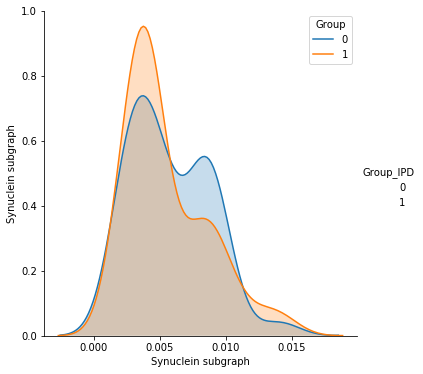

Ks_2sampResult(statistic=0.18446230386528895, pvalue=0.3219347836556863)


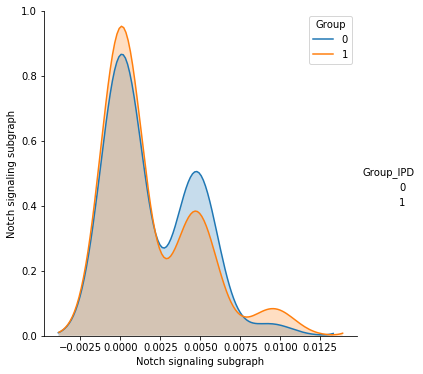

Ks_2sampResult(statistic=0.17183314198239572, pvalue=0.40381789508122556)


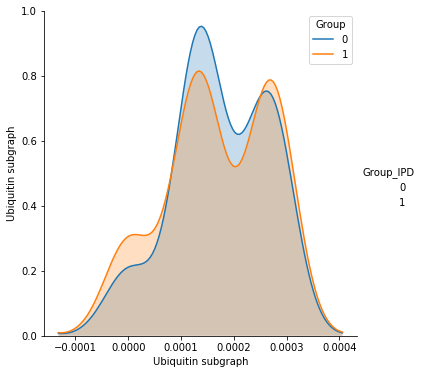

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


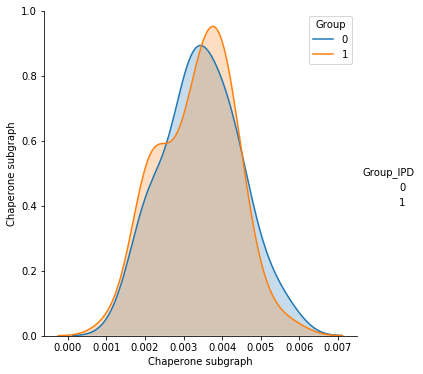

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


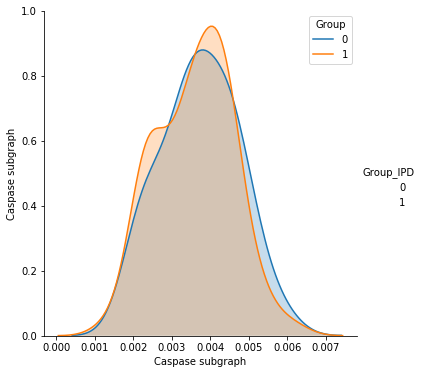

Ks_2sampResult(statistic=0.12629161882893225, pvalue=0.7689568335043115)


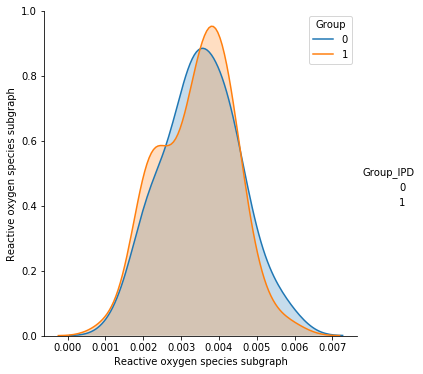

Ks_2sampResult(statistic=0.11174894756984309, pvalue=0.8743272639566686)


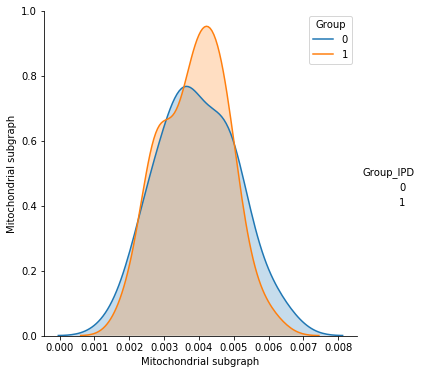

Ks_2sampResult(statistic=0.17336394948335246, pvalue=0.3939365993175922)


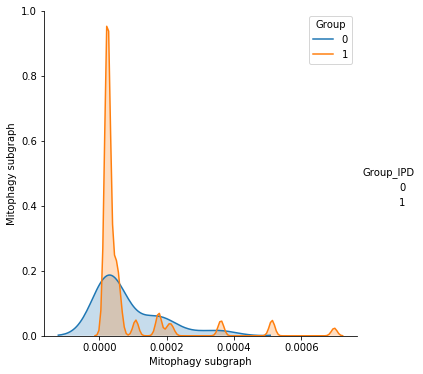

Ks_2sampResult(statistic=0.1584385763490241, pvalue=0.5045260653865571)


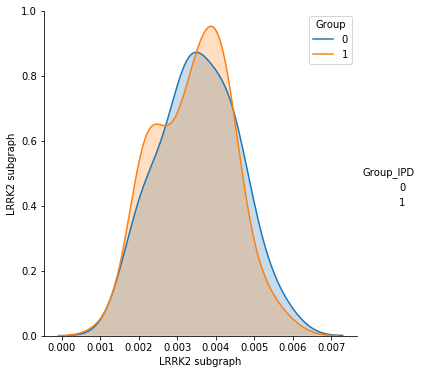

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


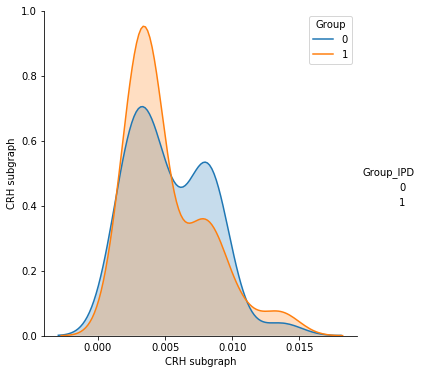

Ks_2sampResult(statistic=0.15461155759663223, pvalue=0.5344193246815248)


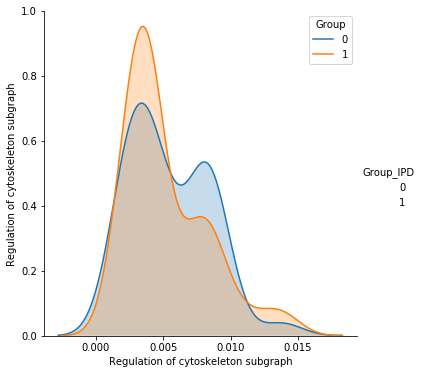

Ks_2sampResult(statistic=0.15461155759663223, pvalue=0.5344193246815248)


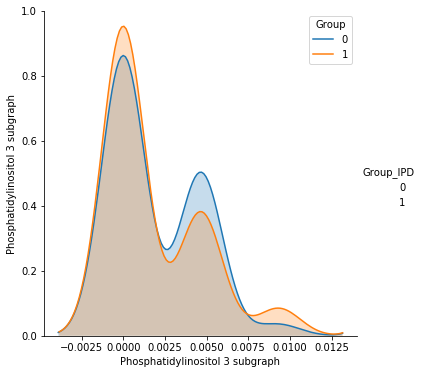

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


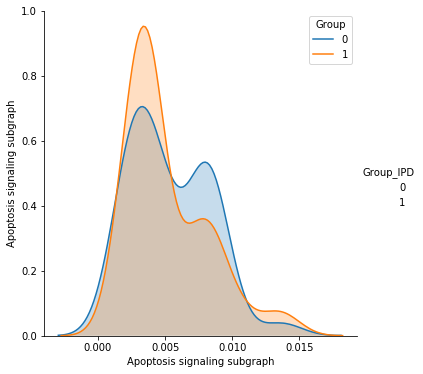

Ks_2sampResult(statistic=0.15461155759663223, pvalue=0.5344193246815248)


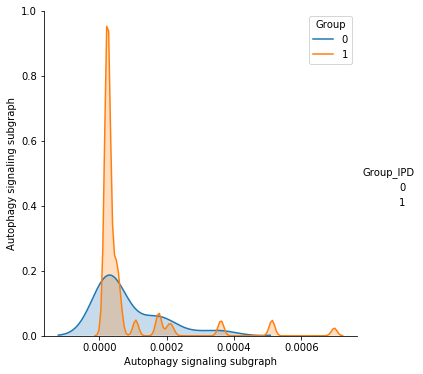

Ks_2sampResult(statistic=0.1584385763490241, pvalue=0.5045260653865571)


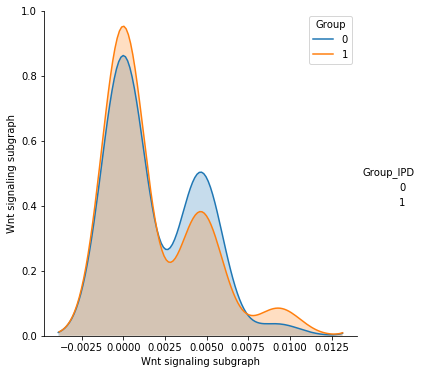

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


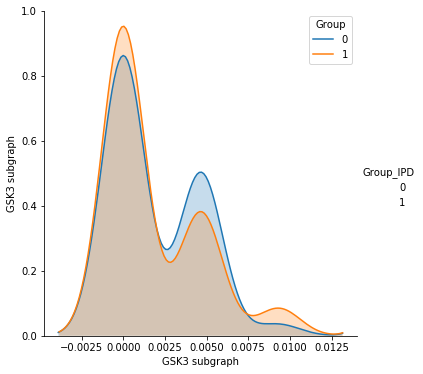

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


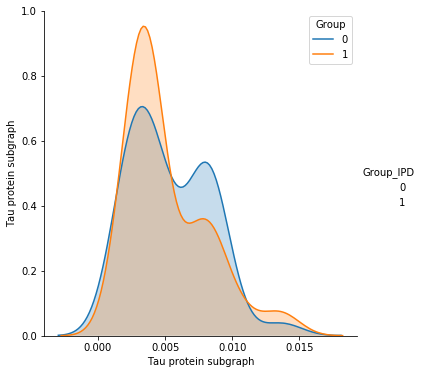

Ks_2sampResult(statistic=0.15461155759663223, pvalue=0.5344193246815248)


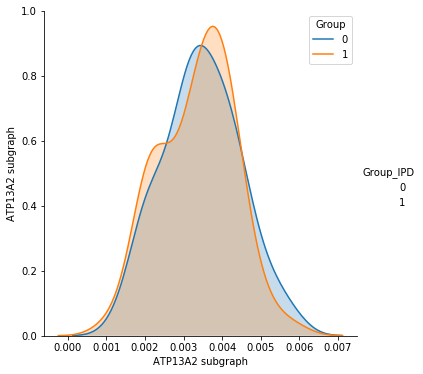

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


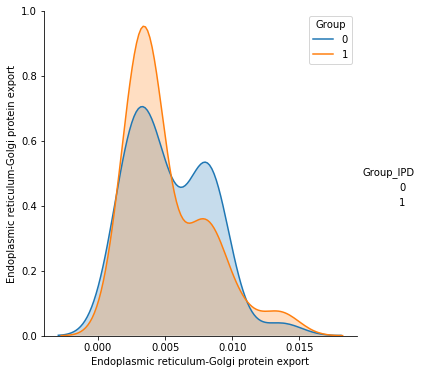

Ks_2sampResult(statistic=0.15461155759663223, pvalue=0.5344193246815248)


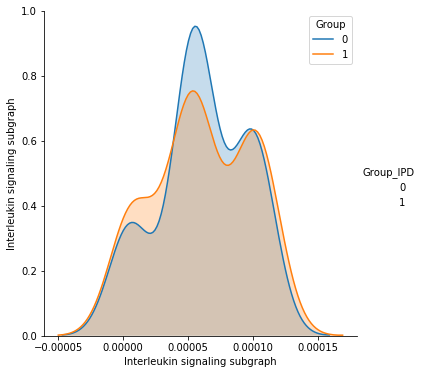

Ks_2sampResult(statistic=0.1251435132032147, pvalue=0.7763151732584617)


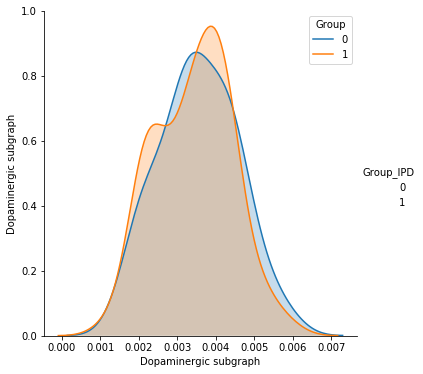

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


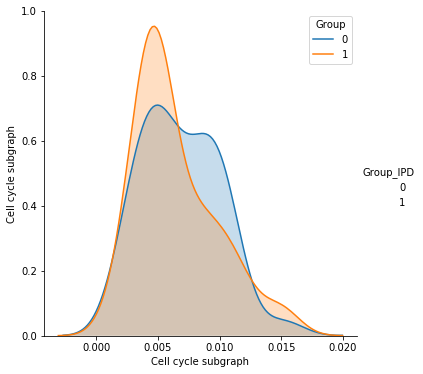

Ks_2sampResult(statistic=0.1653272101033295, pvalue=0.4513418311366071)


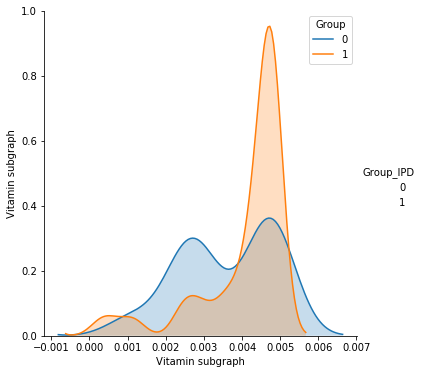

Ks_2sampResult(statistic=0.30807500956754685, pvalue=0.01406692791816122)


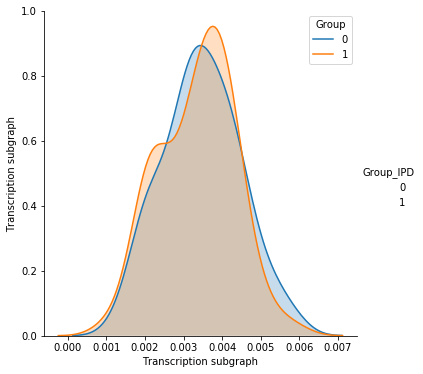

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


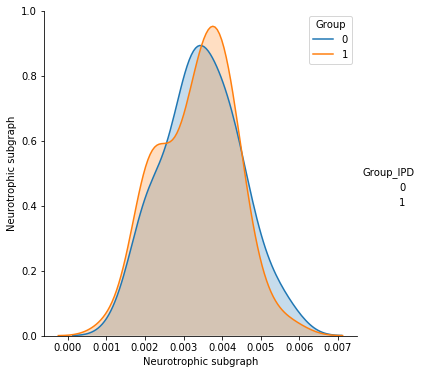

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


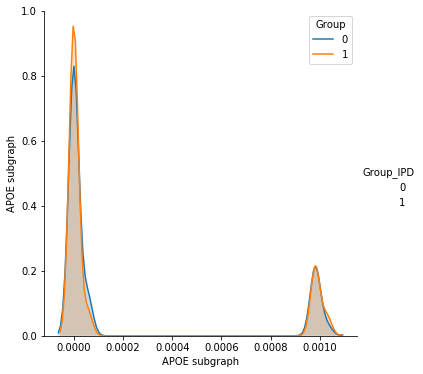

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


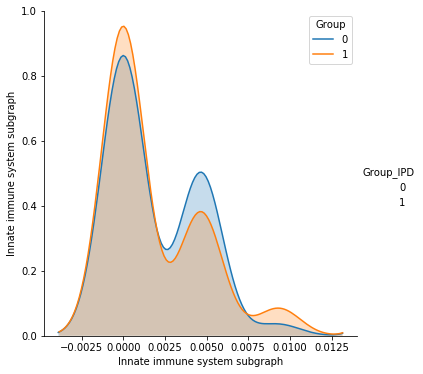

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


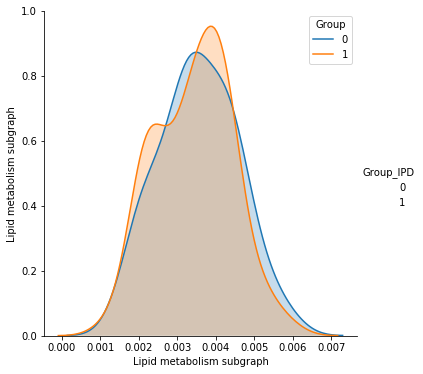

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


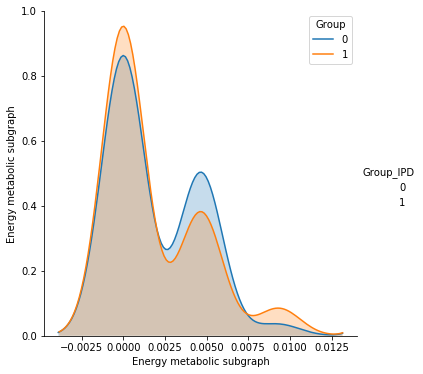

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


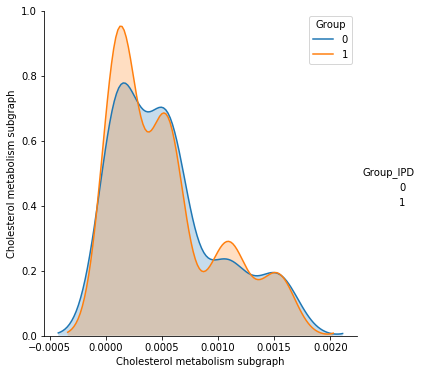

Ks_2sampResult(statistic=0.052430156907768845, pvalue=0.9999938151743312)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


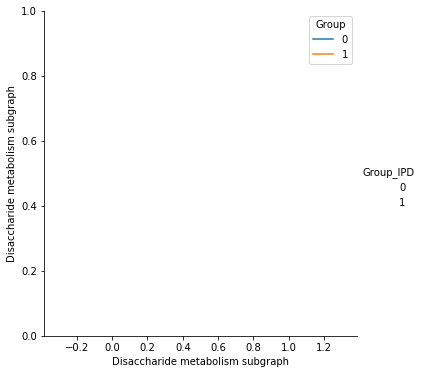

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


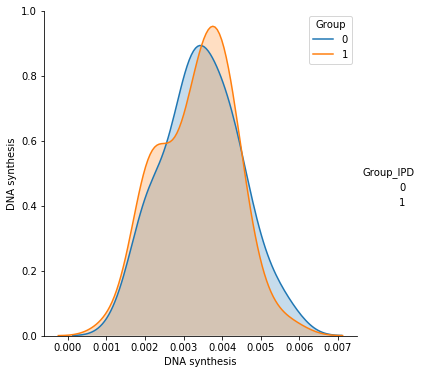

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


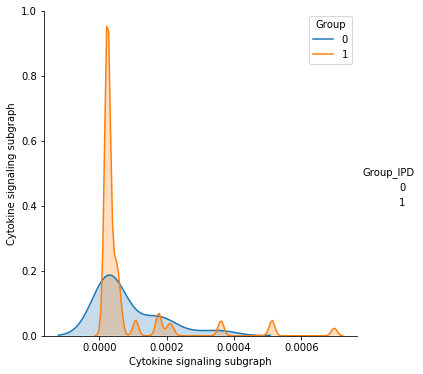

Ks_2sampResult(statistic=0.1584385763490241, pvalue=0.5045260653865571)


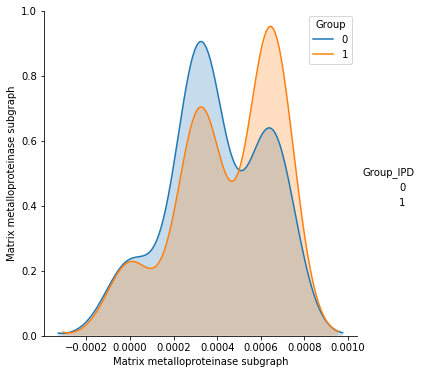

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


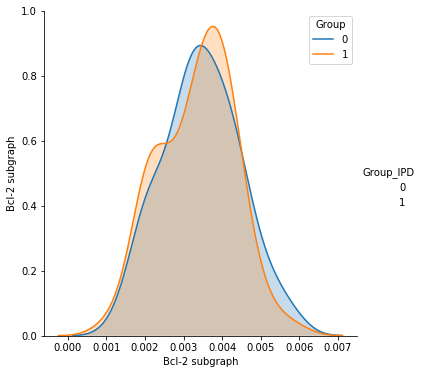

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


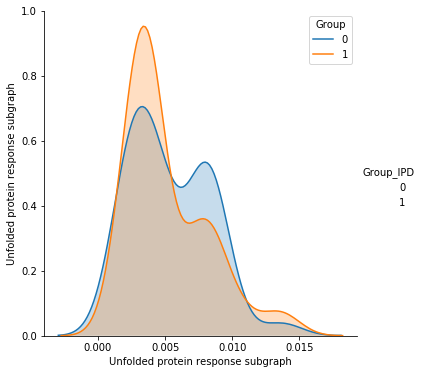

Ks_2sampResult(statistic=0.15461155759663223, pvalue=0.5344193246815248)


In [60]:
#plot
for col in dann_mechs_groups.columns:
    if col!="Group_IPD":
        sns.pairplot(dann_mechs_groups[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        plt.legend(title='Group')
        ks_test=stats.ks_2samp(dannmechs_control[col],dannmechs_sick[col])
        plt.show()
        print (ks_test)

In [15]:
data_dann.to_csv("../Input_for_Models/Input_MANCOVA/chols_Mechs_dann_confs.csv",header=True,index=True)

In [8]:
############################## dann scaled ##########################
dann_mechanism_scores_scaled=pd.read_csv("../Input_for_Models/dann_mechanisms_scores_scaled_processed.csv")
dann_mechanism_scores_scaled=dann_mechanism_scores_scaled.rename(columns={"Sample":"AETID"})
dann_mechanism_scores_scaled=dann_mechanism_scores_scaled.set_index("AETID",inplace=False)
dann_mechanism_scores_scaled

MAPK subgraph  Calcium-dependent signal transduction  \
AETID                                                           
AET0044      -0.481286                              -0.520376   
AET0380      -0.481286                              -0.531934   
AET0027       0.805779                               0.321082   
AET0049      -0.481286                              -0.249085   
AET0006       0.805779                               0.715997   
...                ...                                    ...   
AET0021       0.805779                               0.274955   
AET0071      -0.481286                              -0.113801   
AET0138       1.138337                               1.418814   
AET0111      -0.481286                              -0.090892   
AET0390      -0.481286                              -0.194703   

         Synuclein subgraph  Notch signaling subgraph  Ubiquitin subgraph  \
AETID                                                                       
AET0044            0.938136                  1.020087            1.111860   
AET0380           -0.371179                 -0.702864           -0.369448   
AET0027           -0.469557                 -0.646919            1.111860   
AET0049           -0.375884                 -0.702864            1.111860   
AET0006            1.439416                  1.076032           -1.850757   
...                     ...                       ...                 ...   
AET0021           -1.230544                 -0.646919            1.111860   
AET0071           -0.655009                 -0.702864            1.111860   
AET0138           -0.404500                 -0.632464            1.111860   
AET0111            0.904032                  1.012292            1.111860   
AET0390           -0.773420                 -0.702864           -0.369448   

         Chaperone subgraph  Caspase subgraph  \
AETID                                           
AET0044            0.065285          0.112616   
AET0380            0.971851          0.877000   
AET0027           -0.495614         -0.291220   
AET0049            0.816030          0.862441   
AET0006            1.744284          1.663793   
...                     ...               ...   
AET0021           -1.988471         -1.782247   
AET0071           -0.048763         -0.001293   
AET0138            0.530349          0.773892   
AET0111           -0.018561          0.028872   
AET0390           -0.274384         -0.367707   

         Reactive oxygen species subgraph  Mitochondrial subgraph  \
AETID                                                               
AET0044                          0.057938               -0.101104   
AET0380                          0.963100                1.110019   
AET0027                         -0.553011               -0.495817   
AET0049                          0.843089                0.957905   
AET0006                          1.737047                1.364675   
...                                   ...                     ...   
AET0021                         -2.051808               -2.279286   
AET0071                         -0.004628                0.113683   
AET0138                          0.571582                0.545233   
AET0111                          0.028478               -0.509080   
AET0390                         -0.240509               -0.758817   

         Mitophagy subgraph  ...  Innate immune system subgraph  \
AETID                        ...                                  
AET0044           -0.481286  ...                       1.048297   
AET0380           -0.481286  ...                      -0.686719   
AET0027            0.805779  ...                      -0.686719   
AET0049           -0.481286  ...                      -0.686719   
AET0006            0.805779  ...                       1.048297   
...                     ...  ...                            ...   
AET0021            0.805779  ...                      -0.686719   
AET0071           -0.4

In [9]:
data_dann_scaled = pd.concat([outcomes,dann_mechanism_scores_scaled,confounder], axis=1, sort=False)

In [10]:
data_dann_scaled.to_csv("../Input_for_Models/Input_MANCOVA/chols_Mechs_dann_scaled_confs.csv",header=True,index=True)

In [10]:
#with principal components
CADD13_PCs=pd.read_csv("../Input_for_Models/CADD13_mechanisms_PrincipalComponents.csv")
CADD13_PCs=CADD13_PCs.drop(["Unnamed: 0"],axis=1)
CADD13_PCs["AETID"]=samples
CADD13_PCs=CADD13_PCs.set_index("AETID",inplace=False)
CADD13_PCs.columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",]


In [11]:
CADD13_PCs

PC1       PC2       PC3       PC4           PC5       PC6  \
AETID                                                                     
AET0044  0.003423 -0.000226  0.000257 -0.000037 -3.125107e-05 -0.000065   
AET0380 -0.001402  0.001193 -0.000211  0.000484  1.550828e-05 -0.000096   
AET0027 -0.002306 -0.000119 -0.000233  0.000321 -7.302939e-07  0.000201   
AET0049 -0.001481  0.001231  0.000325 -0.000095  2.568204e-04 -0.000030   
AET0006  0.004679  0.001498 -0.000339  0.000020 -4.413124e-05 -0.000002   
...           ...       ...       ...       ...           ...       ...   
AET0021 -0.003705 -0.001937  0.000485  0.000107 -1.561570e-04  0.000117   
AET0071 -0.002375  0.000124 -0.000304 -0.000346 -1.297217e-04 -0.000006   
AET0138 -0.001689  0.000889 -0.000264  0.000113 -1.019014e-04  0.000141   
AET0111  0.003178 -0.000530 -0.000315  0.000038 -4.784107e-05 -0.000096   
AET0390 -0.002413  0.000035  0.000412 -0.000419 -2.078723e-04 -0.000037   

              PC7       PC8       PC9      PC10  
AETID                                            
AET0044  0.000028  0.000042  0.000059 -0.000031  
AET0380 -0.000071 -0.000040  0.000064 -0.000017  
AET0027  0.000187  0.000055  0.000029  0.000001  
AET0049  0.000040 -0.000033 -0.000055 -0.000059  
AET0006 -0.000113  0.000112  0.000024  0.000080  
...           ...       ...       ...       ...  
AET0021 -0.000020  0.000129 -0.000036 -0.000028  
AET0071  0.000030 -0.000079 -0.000039 -0.000057  
AET0138 -0.000044  0.000039 -0.000044 -0.000056  
AET0111  0.000022  0.000137  0.000029 -0.000011  
AET0390  0.000009  0.000088 -0.000058  0.000045  

[106 rows x 10 columns]

In [12]:
#merge again
#merge them 
data_pcs = pd.concat([outcomes,CADD13_PCs,confounder], axis=1, sort=False)

In [13]:
data_pcs.to_csv("../Input_for_Models/Input_MANCOVA/chols_PCs_confs.csv",header=True,index=True)

In [14]:
################################################################################################

In [15]:
#with principal components SCALED
CADD13_PCs_scaled=pd.read_csv("../Input_for_Models/CADD13_mechanisms_PrincipalComponents_scaled.csv")
CADD13_PCs_scaled=CADD13_PCs_scaled.drop(["Unnamed: 0"],axis=1)
CADD13_PCs_scaled["AETID"]=samples
CADD13_PCs_scaled=CADD13_PCs_scaled.set_index("AETID",inplace=False)
CADD13_PCs_scaled.columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",]

In [16]:
CADD13_PCs_scaled

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
AETID                                                                           
AET0044  3.189940  1.894934 -1.723609 -0.188578 -0.832131  0.699532 -0.019742   
AET0380  0.300159 -3.460376 -0.748416 -0.148801  0.588147 -0.949976 -0.395029   
AET0027 -2.646557 -0.351968  1.821846 -1.096155 -1.586295 -0.067098 -0.791966   
AET0049  0.501464 -3.599681 -0.663071  2.491907 -0.717220  0.528938 -0.486433   
AET0006  7.814074 -1.424846  1.461331 -1.180856  0.391907 -0.062001  0.385525   
...           ...       ...       ...       ...       ...       ...       ...   
AET0021 -7.149500  3.343887  1.730132 -1.834900 -2.590899  0.787313  1.015669   
AET0071 -2.379976 -1.508920 -0.583033 -0.483725  1.051040  0.363710 -1.234442   
AET0138 -0.090879 -2.530230  2.856205 -1.157592  0.260132  1.199142 -1.119406   
AET0111  2.385407  2.518757 -1.403970 -0.940156  0.151138  1.773116 -1.318452   
AET0390 -2.490726 -1.237947 -0.599965 -1.127137 -0.131747  1.272651  1.199863   

              PC8       PC9      PC10  
AETID                                  
AET0044 -0.418825 -0.291180  0.400873  
AET0380  0.239940 -0.443732  0.139240  
AET0027  0.883264 -0.699439  0.083304  
AET0049 -1.001594 -0.586683 -0.462677  
AET0006  1.249229  2.008030  0.284551  
...           ...       ...       ...  
AET0021  0.270431 -0.042873 -0.315405  
AET0071 -1.148209 -0.848757 -0.198346  
AET0138 -0.769146 -0.206437 -0.445612  
AET0111 -0.421820  1.322568  0.179606  
AET0390 -0.856743  1.591805 -0.131677  

[106 rows x 10 columns]

In [17]:
data_pc_scaled = pd.concat([outcomes,CADD13_PCs_scaled,confounder], axis=1, sort=False)

In [18]:
data_pc_scaled

Campestanol µg/dl  Campesterol mg/dl  Sitostanol µg/dl  \
AETID                                                             
AET0044          41.458895          46.468789         39.662632   
AET0380          67.878579          76.027737         64.537474   
AET0027          44.008684          46.043947         42.802895   
AET0049          61.334053          56.392579         59.671632   
AET0006          34.404368          35.503211         43.591789   
...                    ...                ...               ...   
AET0021          31.469053          39.662632         25.072000   
AET0071          35.148421          38.095684         30.366684   
AET0138          36.000789          31.469053         43.286526   
AET0111          86.392263          58.947947         86.392263   
AET0390          38.095684          37.188421         46.848474   

         Sitosterol mg/dl  Stigmasterol µg/dl       PC1       PC2       PC3  \
AETID                                                                         
AET0044         44.501789           42.482474  3.189940  1.894934 -1.723609   
AET0380         65.386895           52.602526  0.300159 -3.460376 -0.748416   
AET0027         47.678211           55.210053 -2.646557 -0.351968  1.821846   
AET0049         56.745526           66.070737  0.501464 -3.599681 -0.663071   
AET0006         41.326737           39.177263  7.814074 -1.424846  1.461331   
...                   ...                 ...       ...       ...       ...   
AET0021         31.725579           35.503211 -7.149500  3.343887  1.730132   
AET0071         36.000789           33.430000 -2.379976 -1.508920 -0.583033   
AET0138         34.619421           35.148421 -0.090879 -2.530230  2.856205   
AET0111         86.392263           76.027737  2.385407  2.518757 -1.403970   
AET0390         38.796263           47.913737 -2.490726 -1.237947 -0.599965   

              PC4       PC5  ...       PC7       PC8       PC9      PC10  \
AETID                        ...                                           
AET0044 -0.188578 -0.832131  ... -0.019742 -0.418825 -0.291180  0.400873   
AET0380 -0.148801  0.588147  ... -0.395029  0.239940 -0.443732  0.139240   
AET0027 -1.096155 -1.586295  ... -0.791966  0.883264 -0.699439  0.083304   
AET0049  2.491907 -0.717220  ... -0.486433 -1.001594 -0.586683 -0.462677   
AET0006 -1.180856  0.391907  ...  0.385525  1.249229  2.008030  0.284551   
...           ...       ...  ...       ...       ...       ...       ...   
AET0021 -1.834900 -2.590899  ...  1.015669  0.270431 -0.042873 -0.315405   
AET0071 -0.483725  1.051040  ... -1.234442 -1.148209 -0.848757 -0.198346   
AET0138 -1.157592  0.260132  ... -1.119406 -0.769146 -0.206437 -0.445612   
AET0111 -0.940156  0.151138  ... -1.318452 -0.421820  1.322568  0.179606   
AET0390 -1.127137 -0.131747  ...  1.199863 -0.856743  1.591805 -0.131677   

              Age  Smoking  Alcohol  Sex  Levodopa  Group_IPD  
AETID                                                          
AET0044  0.062505      0.0      2.0    1         0          0  
AET0380  0.890703      1.0      1.0    0         1          0  
AET0027 -2.185458      0.0      1.0    1         0          0  
AET0049  1.009017      0.0      2.0    1         0          1  
AET0006  0.890703      1.0      2.0    0         1          1  
...           ...      ...      ...  ...       ...        ...  
AET0021 -0.292436      1.0      2.0    1         0          0  
AET0071  0.417447      0.0      3.0    0         0          1  
AET0138  0.417447      0.0      2.0    1         0          1  
AET0111  0.180819      1.0      5.0    1         0          0  
AET0390  0.535761      1.0      1.0    0         0          0  

[106 rows x 21 columns]

In [19]:
data_pc_scaled.to_csv("../Input_for_Models/Input_MANCOVA/chols_PCs_scaled_confs.csv",header=True,index=True)

In [30]:
##################################################################################################

In [31]:
# Mutational load
mut_scores=pd.read_csv("../Input_for_Models/Mutational_load_scores_new.csv")
mut_scores=mut_scores.rename({"Unnamed: 0":"AETID"},axis=1)
mut_scores=mut_scores.set_index("AETID",inplace=False)

In [32]:
mut_scores

LRRK2 subgraph  CRH subgraph  Apoptosis signaling subgraph  \
AETID                                                                 
AET0044        0.561576      0.902951                      0.894330   
AET0380        1.073892      0.169180                      0.293814   
AET0027        0.448276      0.080656                      0.121134   
AET0049        0.640394      0.112131                      0.181701   
AET0006        1.078818      0.967213                      1.020619   
...                 ...           ...                           ...   
AET0021        0.236453      0.051803                      0.067010   
AET0071        0.669951      0.113443                      0.186856   
AET0138        0.822660      0.139016                      0.233247   
AET0111        0.689655      0.919344                      0.926546   
AET0390        0.532020      0.095738                      0.152062   

         Caspase subgraph  Regulation of cytoskeleton subgraph  \
AETID                                                            
AET0044          0.589372                             0.884076   
AET0380          1.072464                             0.290446   
AET0027          0.478261                             0.128662   
AET0049          0.666667                             0.179618   
AET0006          1.057971                             1.017834   
...                   ...                                  ...   
AET0021          0.270531                             0.075159   
AET0071          0.695652                             0.184713   
AET0138          0.845411                             0.231847   
AET0111          0.714976                             0.915924   
AET0390          0.541063                             0.150318   

         Innate immune system subgraph  Disaccharide metabolism subgraph  \
AETID                                                                      
AET0044                       0.948911                               0.0   
AET0380                       0.030053                               0.0   
AET0027                       0.029301                               0.0   
AET0049                       0.030804                               0.0   
AET0006                       0.948911                               0.0   
...                                ...                               ...   
AET0021                       0.028550                               0.0   
AET0071                       0.027799                               0.0   
AET0138                       0.034560                               0.0   
AET0111                       0.948159                               0.0   
AET0390                       0.028550                               0.0   

         Wnt signaling subgraph  Energy metabolic subgraph  \
AETID                                                        
AET0044                0.996564                   0.996569   
AET0380                0.017182                   0.018868   
AET0027                0.017182                   0.018868   
AET0049                0.018900                   0.020583   
AET0006                0.996564                   0.996569   
...                         ...                        ...   
AET0021                0.018900                   0.020583   
AET0071                0.015464                   0.015437   
AET0138                0.025773                   0.029160   
AET0111                0.994845                   0.994854   
AET0390                0.017182                   0.020583   

         Cell cycle subgraph  ...  Chaperone subgraph  MAPK subgraph  \
AETID                         ...                                      
AET0044             0.855279  ...            0.587629       0.000000   
AET0380             0.336892  ...            1.123711       0.000000   
AET0027             0.179122  ...            0.432990       0.388889   
AET0049             0.190985  ...            0.670103       0.000000  

In [27]:
################################################################################################

In [33]:
# Mutational load scaled
mut_scores_scaled=pd.read_csv("../Input_for_Models/Mutational_load_scores_new_scaled.csv")
mut_scores_scaled
mut_scores_scaled=mut_scores_scaled.rename({"Sample":"AETID"},axis=1)
mut_scores_scaled=mut_scores_scaled.set_index("AETID",inplace=False)

In [40]:
# cat all
data_mut = pd.concat([outcomes,mut_scores,confounder], axis=1, sort=False)
data_mut_scaled = pd.concat([outcomes,mut_scores_scaled,confounder], axis=1, sort=False)

In [35]:
data_mut_scaled

Campestanol µg/dl  Campesterol mg/dl  Sitostanol µg/dl  \
AETID                                                             
AET0044          41.458895          46.468789         39.662632   
AET0380          67.878579          76.027737         64.537474   
AET0027          44.008684          46.043947         42.802895   
AET0049          61.334053          56.392579         59.671632   
AET0006          34.404368          35.503211         43.591789   
...                    ...                ...               ...   
AET0021          31.469053          39.662632         25.072000   
AET0071          35.148421          38.095684         30.366684   
AET0138          36.000789          31.469053         43.286526   
AET0111          86.392263          58.947947         86.392263   
AET0390          38.095684          37.188421         46.848474   

         Sitosterol mg/dl  Stigmasterol µg/dl  LRRK2 subgraph  CRH subgraph  \
AETID                                                                         
AET0044         44.501789           42.482474       -0.350224      1.035653   
AET0380         65.386895           52.602526        1.658555     -0.562637   
AET0027         47.678211           55.210053       -0.794474     -0.755460   
AET0049         56.745526           66.070737       -0.041181     -0.686900   
AET0006         41.326737           39.177263        1.677870      1.175628   
...                   ...                 ...             ...           ...   
AET0021         31.725579           35.503211       -1.625027     -0.818306   
AET0071         36.000789           33.430000        0.074710     -0.684044   
AET0138         34.619421           35.148421        0.673480     -0.628339   
AET0111         86.392263           76.027737        0.151970      1.071361   
AET0390         38.796263           47.913737       -0.466115     -0.722608   

         Apoptosis signaling subgraph  Caspase subgraph  \
AETID                                                     
AET0044                      0.969850         -0.294789   
AET0380                     -0.415498          1.650890   
AET0027                     -0.813860         -0.742295   
AET0049                     -0.674136          0.016520   
AET0006                      1.261190          1.592520   
...                               ...               ...   
AET0021                     -0.938720         -1.578937   
AET0071                     -0.662244          0.133261   
AET0138                     -0.555222          0.736421   
AET0111                      1.044172          0.211088   
AET0390                     -0.742511         -0.489357   

         Regulation of cytoskeleton subgraph  ...  Notch signaling subgraph  \
AETID                                         ...                             
AET0044                             0.964573  ...                  1.037848   
AET0380                            -0.420084  ...                 -0.696252   
AET0027                            -0.797448  ...                 -0.674956   
AET0049                            -0.678593  ...                 -0.693209   
AET0006                             1.276567  ...                  1.059144   
...                                      ...  ...                       ...   
AET0021                            -0.922245  ...                 -0.671913   
AET0071                            -0.666708  ...                 -0.699294   
AET0138                            -0.556767  ...                 -0.677998   
AET0111                             1.038857  ...                  1.034806   
AET0390                            -0.746934  ...                 -0.696252   

         Calcium-dependent signal transduction  Transport related subgraph  \
AETID                                                                        
AET0044                              -0.448911                    1.607665   
AET0380                              -0.448911                   -1.250406   
A

In [36]:
##################### plot and examine ###################

In [43]:
mut_groups=pd.concat([mut_scores,confounder],axis=1,sort=False)

In [44]:
mut_groups=mut_groups.drop(["Age","Smoking","Alcohol","Sex","Levodopa"],axis=1)
#
mut_control = mut_groups.loc[data_mut['Group_IPD'] == 0]
mut_sick =  mut_groups.loc[data_mut['Group_IPD'] == 1]

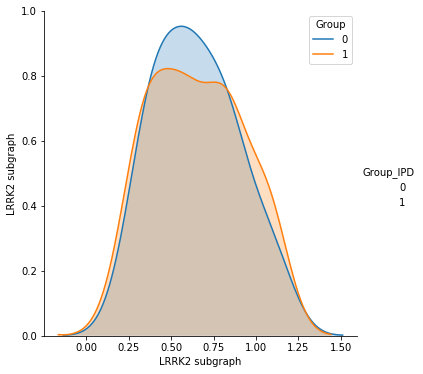

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


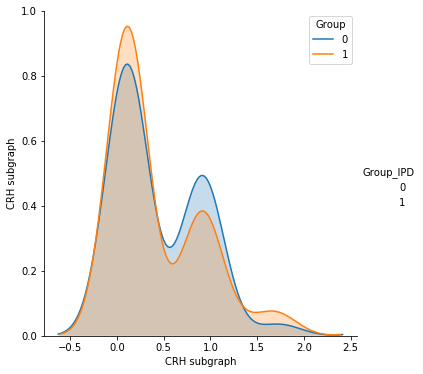

Ks_2sampResult(statistic=0.14580941446613088, pvalue=0.6075883185287074)


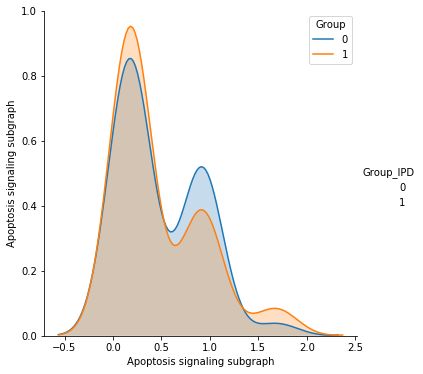

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


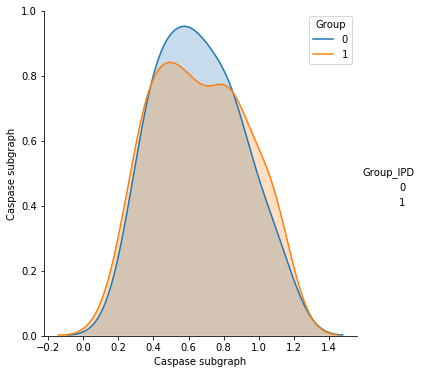

Ks_2sampResult(statistic=0.11021814006888633, pvalue=0.8826521915064645)


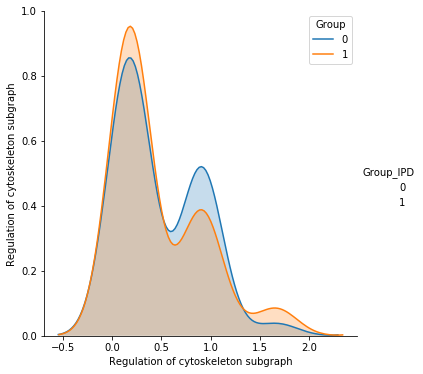

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


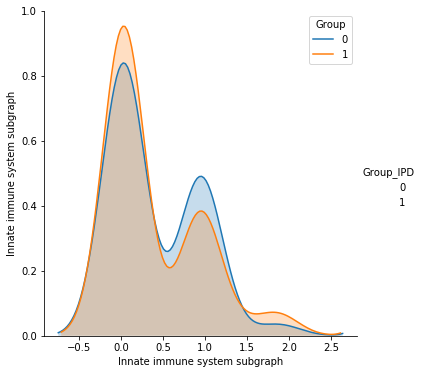

Ks_2sampResult(statistic=0.0876387294297742, pvalue=0.9790192770062475)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


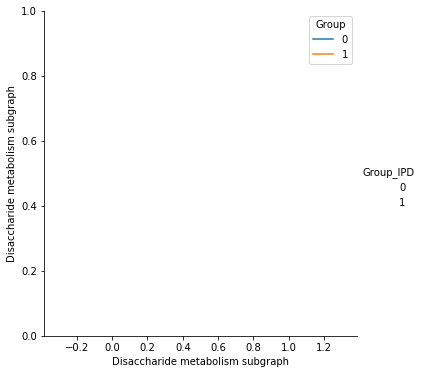

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


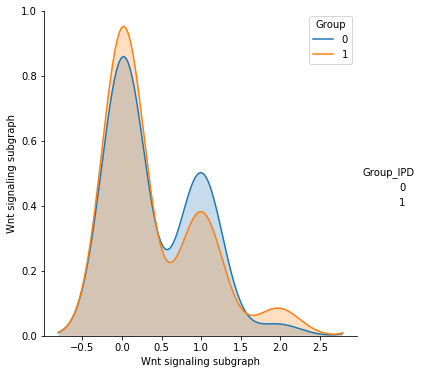

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


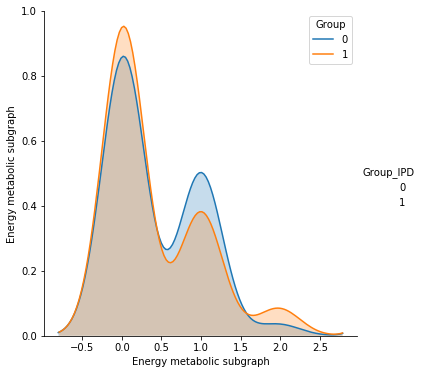

Ks_2sampResult(statistic=0.07577497129735936, pvalue=0.995654746247484)


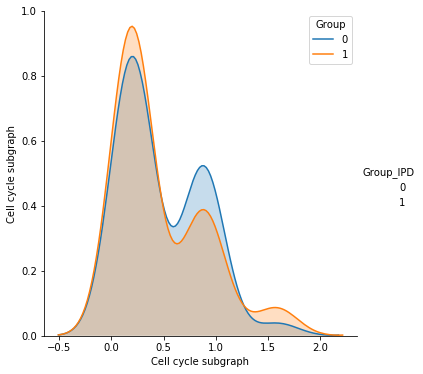

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


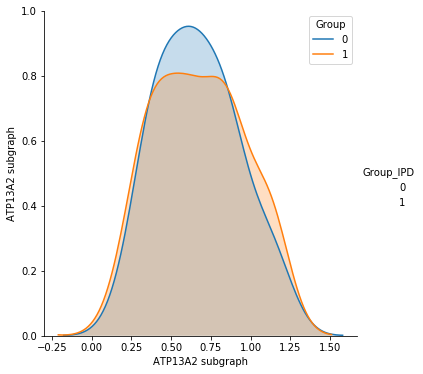

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


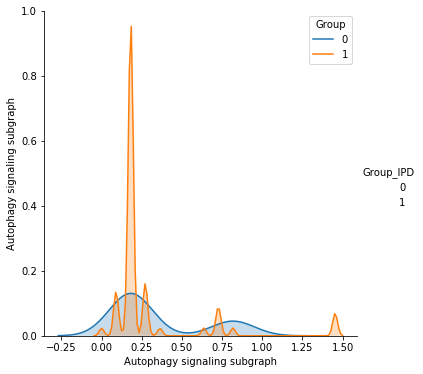

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


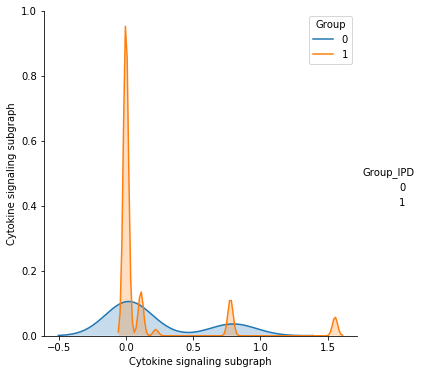

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


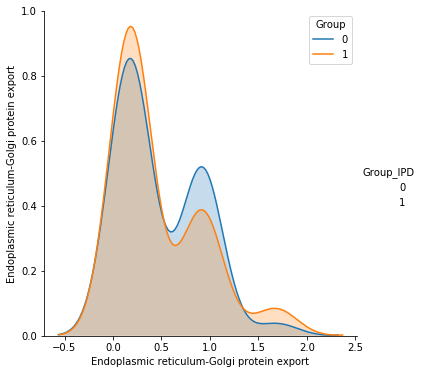

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


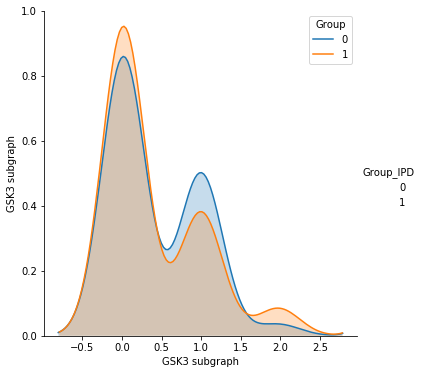

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


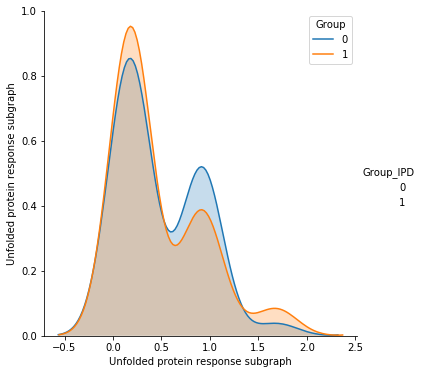

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


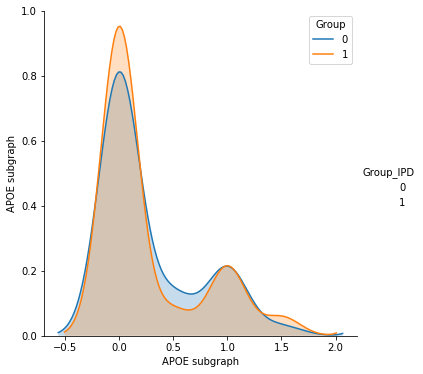

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


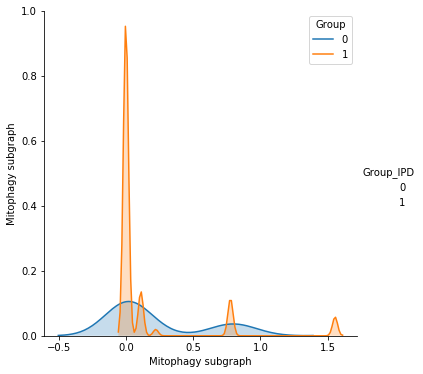

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


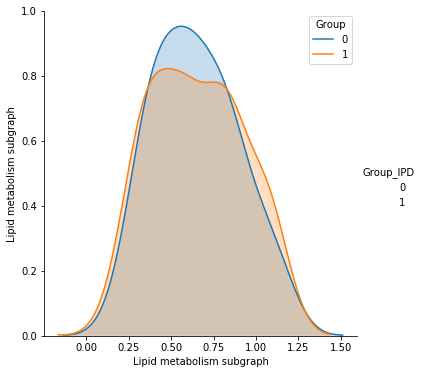

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


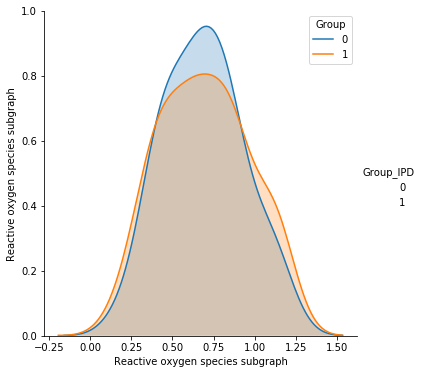

Ks_2sampResult(statistic=0.10600841944125526, pvalue=0.907591672336959)


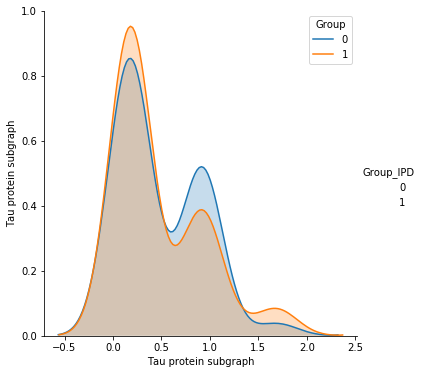

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


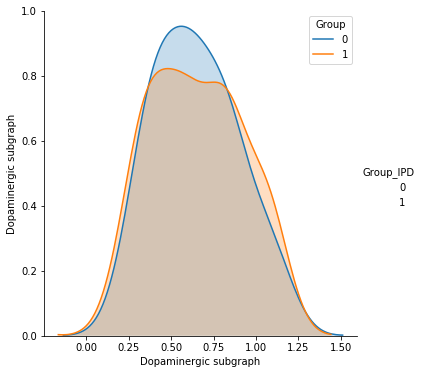

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


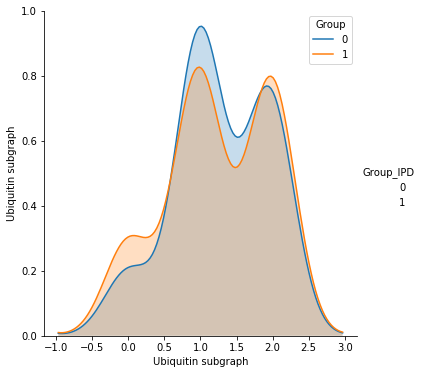

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


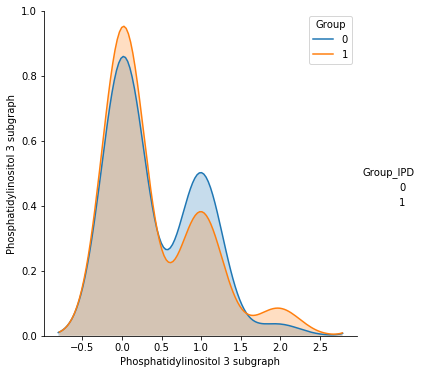

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


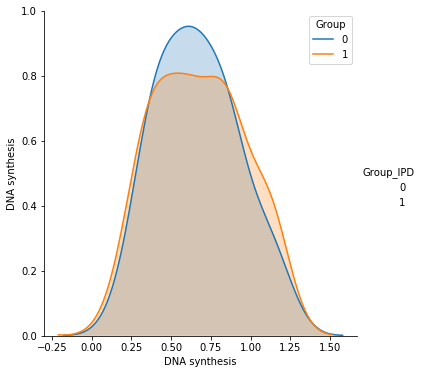

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


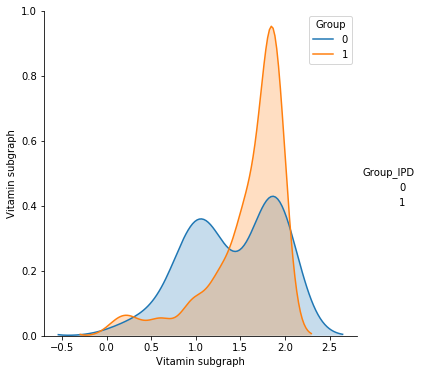

Ks_2sampResult(statistic=0.3038652889399158, pvalue=0.016093748309058298)


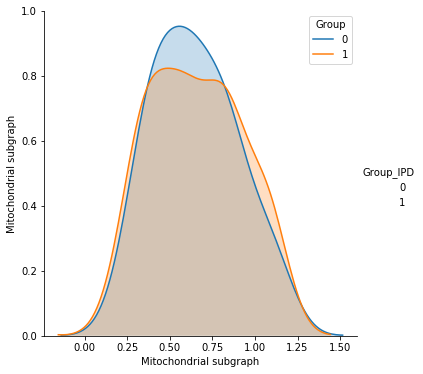

Ks_2sampResult(statistic=0.09529276693455797, pvalue=0.9563830473174161)


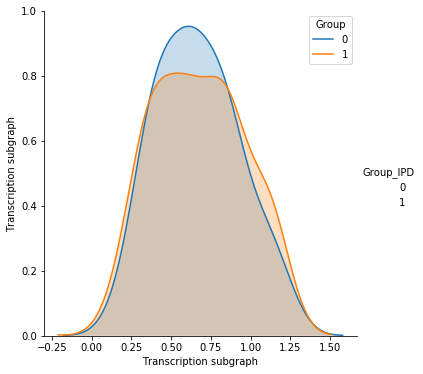

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


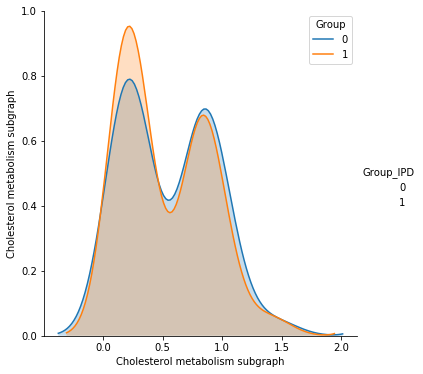

Ks_2sampResult(statistic=0.06926903941829315, pvalue=0.9986949601507721)


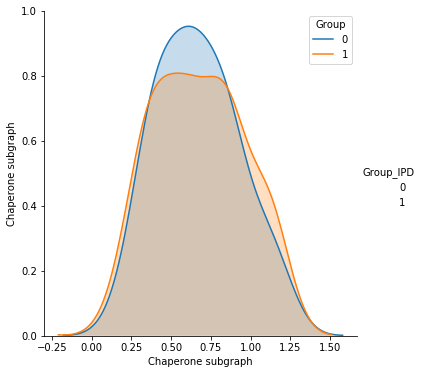

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


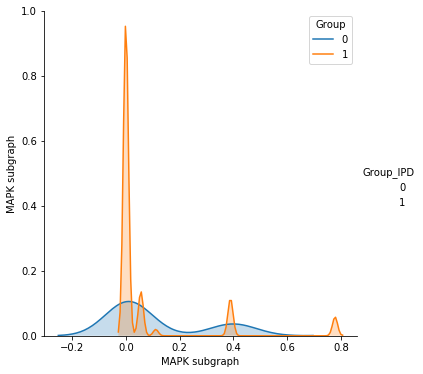

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


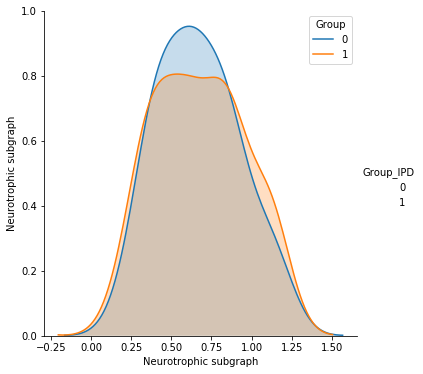

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


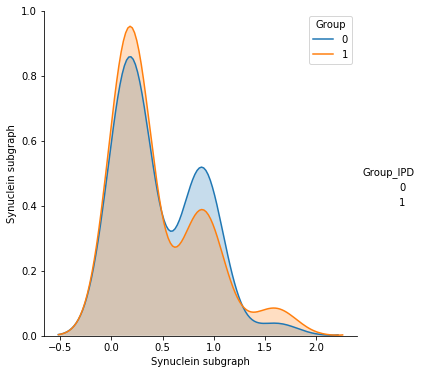

Ks_2sampResult(statistic=0.11595866819747416, pvalue=0.8462065339345702)


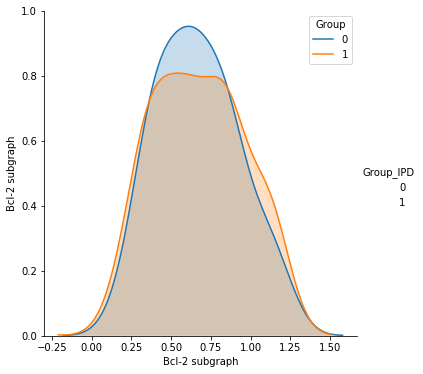

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


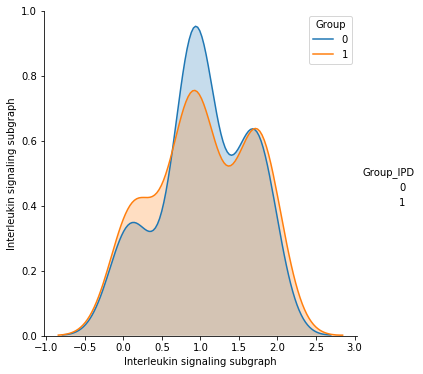

Ks_2sampResult(statistic=0.10830463069269039, pvalue=0.8951052522732157)


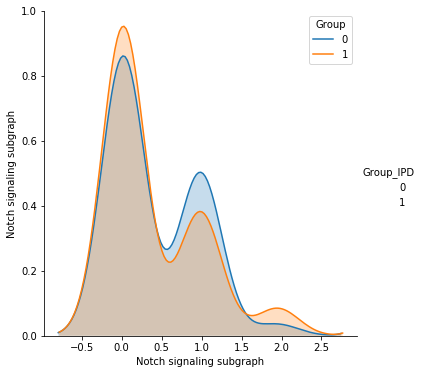

Ks_2sampResult(statistic=0.1377726750861079, pvalue=0.6736137993359828)


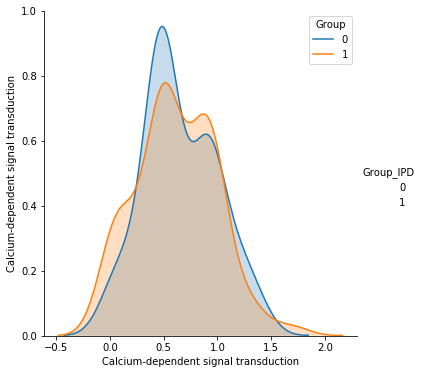

Ks_2sampResult(statistic=0.09146574818216609, pvalue=0.9687042400939759)


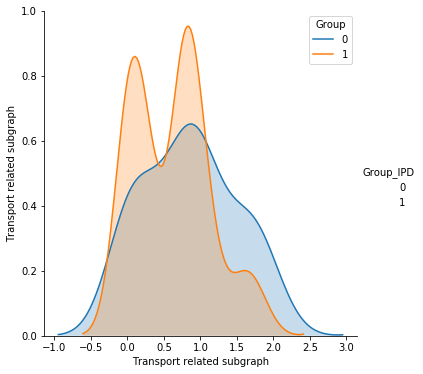

Ks_2sampResult(statistic=0.21201683888251052, pvalue=0.18441700434726427)


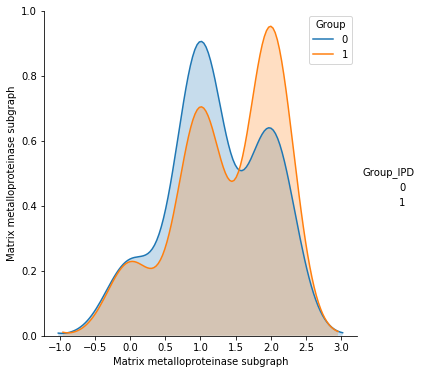

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


In [58]:
#plot
for col in mut_groups.columns:
    if col!="Group_IPD":
        sns.pairplot(mut_groups[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        plt.legend(title='Group')
        plt.show()
        ks_test=stats.ks_2samp(mut_control[col],mut_sick[col])
        print (ks_test)

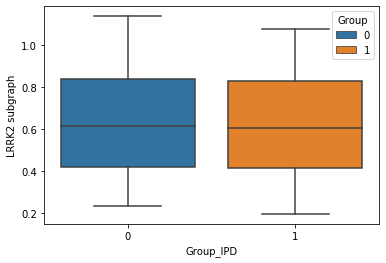

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


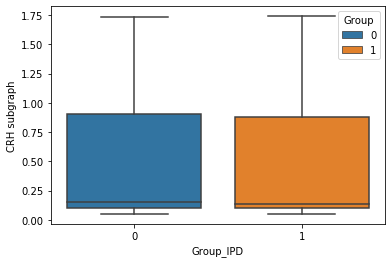

Ks_2sampResult(statistic=0.14580941446613088, pvalue=0.6075883185287074)


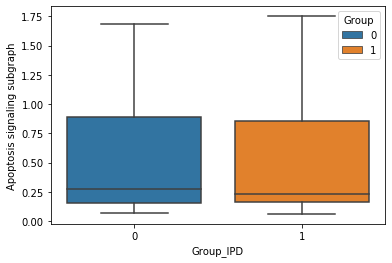

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


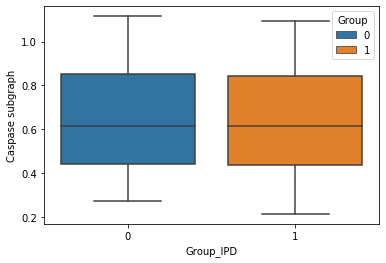

Ks_2sampResult(statistic=0.11021814006888633, pvalue=0.8826521915064645)


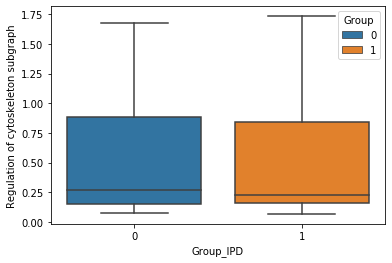

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


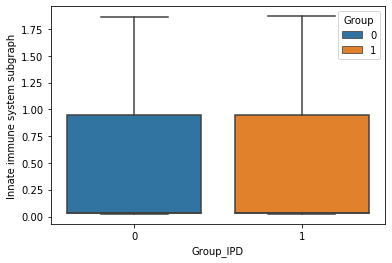

Ks_2sampResult(statistic=0.0876387294297742, pvalue=0.9790192770062475)


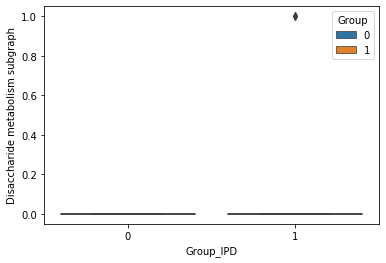

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


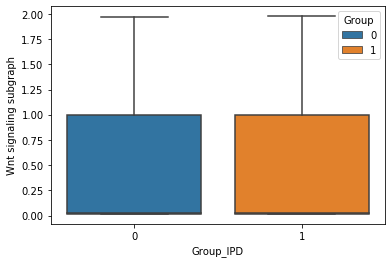

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


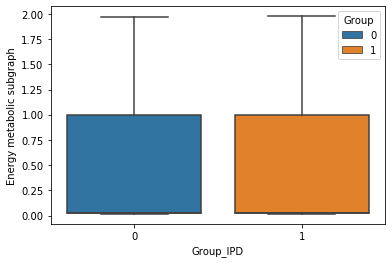

Ks_2sampResult(statistic=0.07577497129735936, pvalue=0.995654746247484)


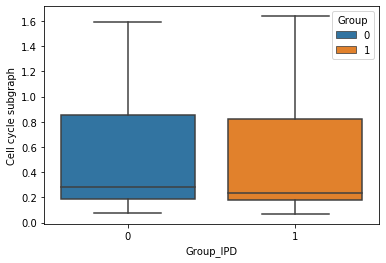

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


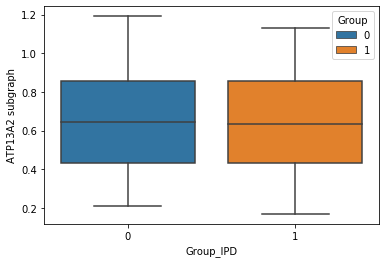

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


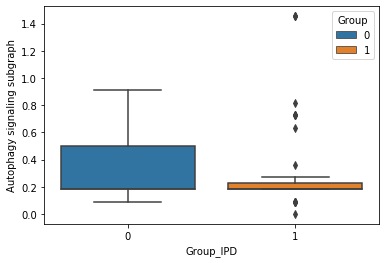

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


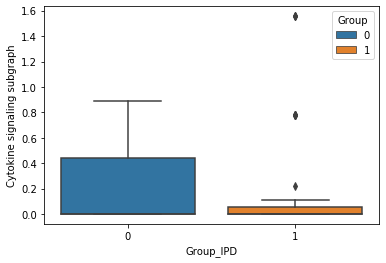

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


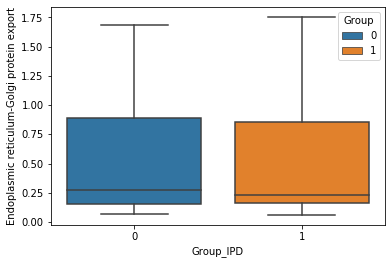

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


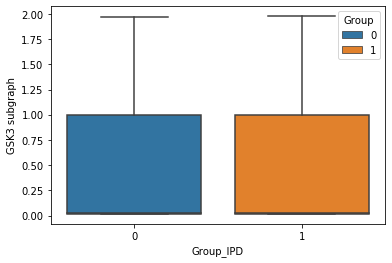

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


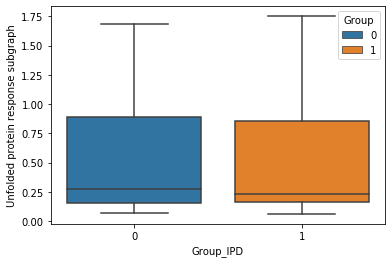

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


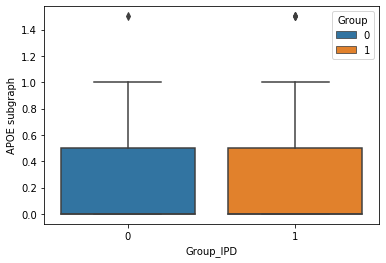

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


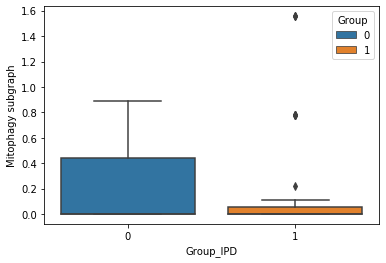

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


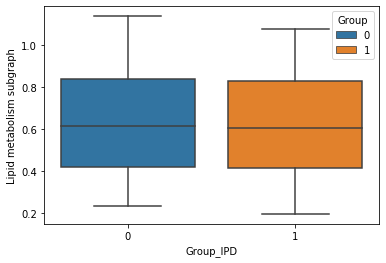

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


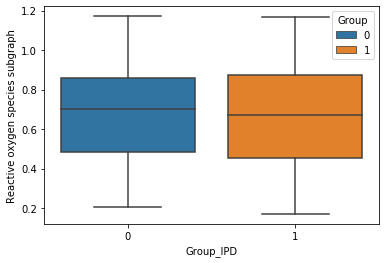

Ks_2sampResult(statistic=0.10600841944125526, pvalue=0.907591672336959)


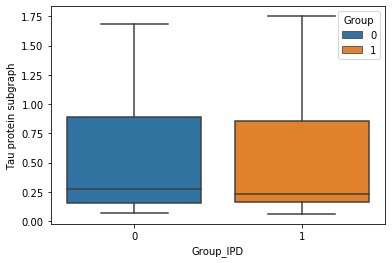

Ks_2sampResult(statistic=0.13088404133180254, pvalue=0.7319909716882242)


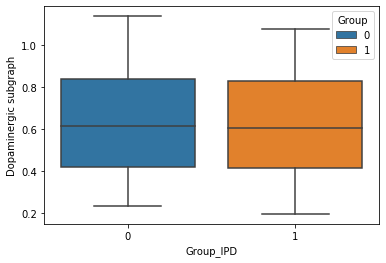

Ks_2sampResult(statistic=0.09567546880979717, pvalue=0.9548312905716486)


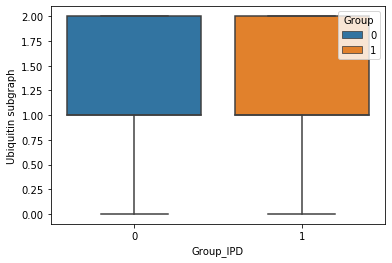

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


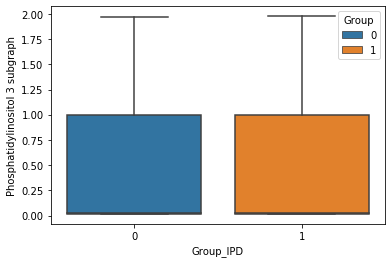

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


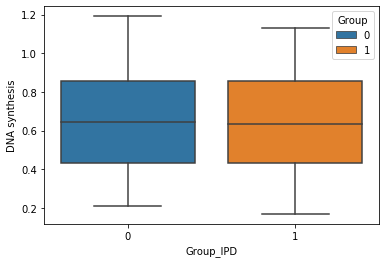

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


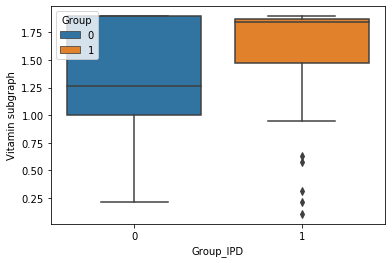

Ks_2sampResult(statistic=0.3038652889399158, pvalue=0.016093748309058298)


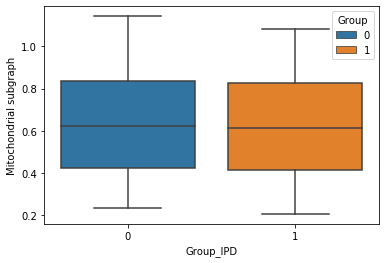

Ks_2sampResult(statistic=0.09529276693455797, pvalue=0.9563830473174161)


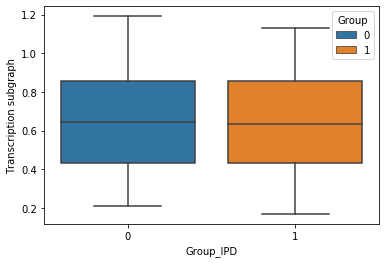

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


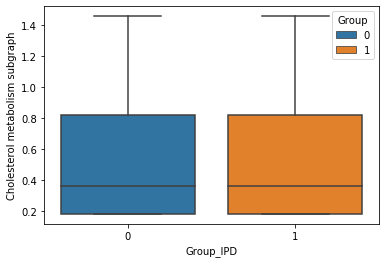

Ks_2sampResult(statistic=0.06926903941829315, pvalue=0.9986949601507721)


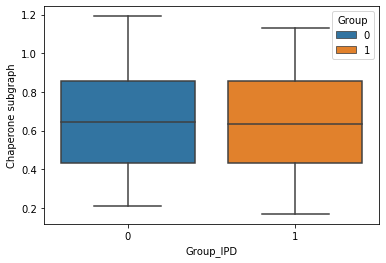

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


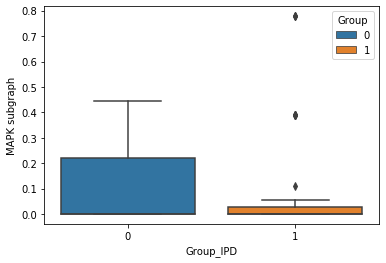

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


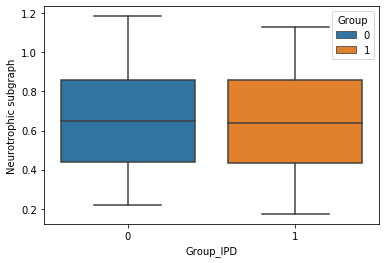

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


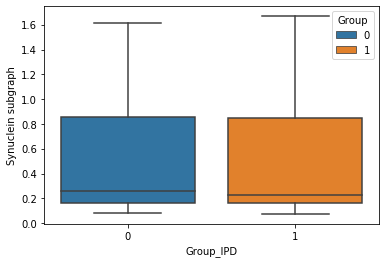

Ks_2sampResult(statistic=0.11595866819747416, pvalue=0.8462065339345702)


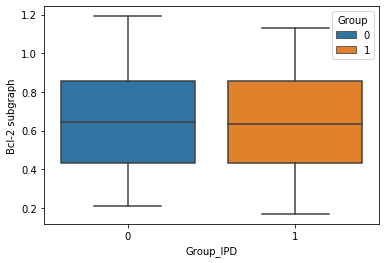

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


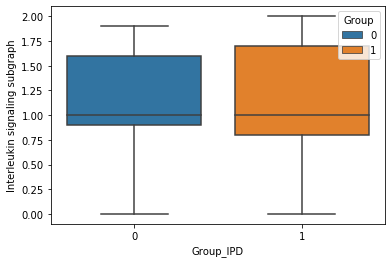

Ks_2sampResult(statistic=0.10830463069269039, pvalue=0.8951052522732157)


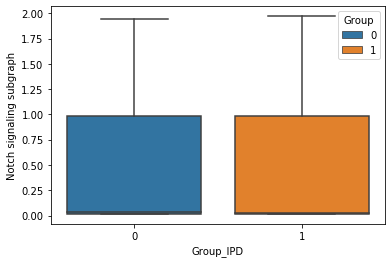

Ks_2sampResult(statistic=0.1377726750861079, pvalue=0.6736137993359828)


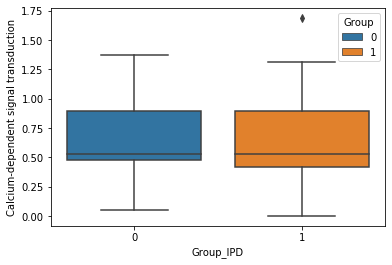

Ks_2sampResult(statistic=0.09146574818216609, pvalue=0.9687042400939759)


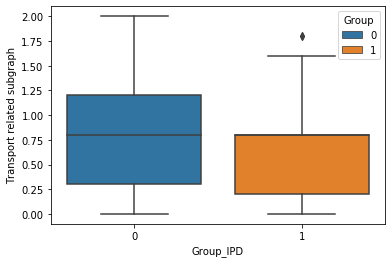

Ks_2sampResult(statistic=0.21201683888251052, pvalue=0.18441700434726427)


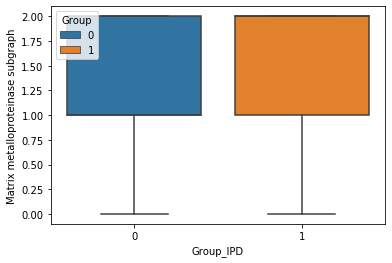

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


In [52]:
for col in mut_groups.columns:
    if col!="Group_IPD":
        sns.boxplot(data=mut_groups[[col,"Group_IPD"]],y=col,x="Group_IPD",dodge=False,hue="Group_IPD")
        plt.legend(title='Group')
        ks_test=stats.ks_2samp(mut_control[col],mut_sick[col])
        plt.show()
        print (ks_test)

In [10]:
#write output 
data_mut.to_csv("../Input_for_Models/Input_MANCOVA/chols_mutationalscores_confs_new.csv",header=True,index=True)
data_mut_scaled.to_csv("../Input_for_Models/Input_MANCOVA/chols_mutationalscores_scaled_confs_new.csv",header=True,index=True)

In [ ]:
###########################################################################################################

In [1]:
################################### Prepare dataframes on Gene Level ######################################

In [63]:
###########################################################################################################

In [64]:
mutaional_genelvl_scores=pd.read_csv("../Input_for_Models/Mutational_load_scores_geneslvl_neuro_new.csv")
mutaional_genelvl_scores=mutaional_genelvl_scores.rename(columns={"Unnamed: 0":"AETID"})
mutaional_genelvl_scores=mutaional_genelvl_scores.set_index("AETID",inplace=False)
mutaional_genelvl_scores

GAK     CASP8     GPNMB  GDF5      SNCA      MAPT  GPX1  \
AETID                                                                   
AET0044  0.000000  0.666667  0.964286   0.5  0.029381  0.071183   0.5   
AET0380  0.000000  0.333333  2.000000   1.0  0.056186  0.001227   0.5   
AET0027  0.500000  0.666667  0.714286   0.5  0.021649  0.001227   0.5   
AET0049  0.000000  0.666667  0.714286   1.0  0.033505  0.001350   0.5   
AET0006  0.016667  0.000000  1.000000   0.5  0.054639  0.071183   0.5   
...           ...       ...       ...   ...       ...       ...   ...   
AET0021  0.000000  0.666667  1.000000   1.0  0.010567  0.001350   0.5   
AET0071  0.016667  0.666667  0.000000   1.0  0.035052  0.001105   0.0   
AET0138  0.000000  0.666667  1.000000   1.0  0.042784  0.001841   1.0   
AET0111  0.033333  0.666667  1.000000   1.0  0.036082  0.071060   0.5   
AET0390  0.000000  0.333333  0.000000   1.0  0.027835  0.001227   1.0   

         MAP1LC3A  CPLX1     CRHR1  APOE    CACNB2     FDFT1  STX1B  TOMM40  \
AETID                                                                         
AET0044       0.5    0.0  0.497997  0.25  0.300000  1.000000    2.0     0.5   
AET0380       1.0    0.0  0.022697  0.00  0.300000  1.000000    0.0     1.0   
AET0027       0.5    1.0  0.022029  0.00  0.033333  1.000000    1.0     0.5   
AET0049       1.0    0.0  0.023364  0.50  0.500000  0.222222    0.0     1.0   
AET0006       0.5    1.0  0.497997  0.00  0.300000  1.000000    1.0     0.0   
...           ...    ...       ...   ...       ...       ...    ...     ...   
AET0021       1.0    0.0  0.021362  0.00  0.000000  0.222222    1.0     0.0   
AET0071       1.0    1.0  0.020694  0.00  0.600000  0.222222    1.0     1.0   
AET0138       1.0    0.0  0.023364  0.00  0.566667  0.222222    1.0     0.5   
AET0111       1.0    2.0  0.497997  0.00  0.600000  1.000000    1.0     0.0   
AET0390       1.0    0.0  0.021362  0.00  0.533333  0.222222    1.0     0.0   

            LRRK2   SLC41A1  GBA  
AETID                             
AET0044  0.000000  1.210526  0.0  
AET0380  0.000000  1.894737  0.0  
AET0027  0.051852  1.894737  0.0  
AET0049  0.000000  1.210526  0.0  
AET0006  0.051852  1.894737  0.0  
...           ...       ...  ...  
AET0021  0.051852  0.947368  0.0  
AET0071  0.000000  1.842105  0.0  
AET0138  0.007407  1.842105  0.0  
AET0111  0.000000  1.894737  0.0  
AET0390  0.000000  0.947368  0.0  

[106 rows x 18 columns]

In [65]:
neurommsig_gene_set=list(mutaional_genelvl_scores.columns)
neurommsig_gene_set

['GAK',
 'CASP8',
 'GPNMB',
 'GDF5',
 'SNCA',
 'MAPT',
 'GPX1',
 'MAP1LC3A',
 'CPLX1',
 'CRHR1',
 'APOE',
 'CACNB2',
 'FDFT1',
 'STX1B',
 'TOMM40',
 'LRRK2',
 'SLC41A1',
 'GBA']

In [68]:
# CADD13 genepy
CADD13_gene_scores=pd.read_csv("../Input_for_Models/CADD13_genepy_normed_scores.csv")
CADD13_gene_scores=CADD13_gene_scores.rename(columns={"Sample":"AETID"})
CADD13_gene_scores=CADD13_gene_scores.set_index("AETID",inplace=False)

#Keep only neurommsig genes that are in GenePy's Genes
# we drop ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']
CADD13_gene_scores = CADD13_gene_scores[[x for x in neurommsig_gene_set if x not in ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']]]
CADD13_gene_scores

GAK     CASP8     GPNMB      SNCA      MAPT      APOE    CACNB2  \
AETID                                                                           
AET0044  0.000000  0.000096  0.000465  0.001167  0.001463  0.000038  0.000019   
AET0380  0.000000  0.000048  0.000920  0.001356  0.000000  0.000000  0.000019   
AET0027  0.000272  0.000096  0.000397  0.000980  0.000000  0.000000  0.000002   
AET0049  0.000000  0.000096  0.000397  0.001375  0.000000  0.000298  0.000032   
AET0006  0.000000  0.000000  0.000465  0.001638  0.001463  0.000000  0.000019   
...           ...       ...       ...       ...       ...       ...       ...   
AET0021  0.000000  0.000096  0.000465  0.000494  0.000000  0.000000  0.000000   
AET0071  0.000000  0.000096  0.000000  0.001080  0.000000  0.000000  0.000038   
AET0138  0.000000  0.000096  0.000465  0.001262  0.000000  0.000000  0.000036   
AET0111  0.000000  0.000096  0.000465  0.001087  0.001457  0.000000  0.000039   
AET0390  0.000000  0.000048  0.000000  0.001070  0.000000  0.000000  0.000034   

            FDFT1    TOMM40     LRRK2   SLC41A1  GBA  
AETID                                                 
AET0044  0.000165  0.000072  0.000009  0.000943  0.0  
AET0380  0.000165  0.000145  0.000009  0.001521  0.0  
AET0027  0.000165  0.000072  0.000060  0.001521  0.0  
AET0049  0.000040  0.000145  0.000009  0.000947  0.0  
AET0006  0.000165  0.000000  0.000060  0.001521  0.0  
...           ...       ...       ...       ...  ...  
AET0021  0.000040  0.000000  0.000060  0.000802  0.0  
AET0071  0.000040  0.000145  0.000009  0.001521  0.0  
AET0138  0.000040  0.000072  0.000070  0.001521  0.0  
AET0111  0.000165  0.000000  0.000009  0.001521  0.0  
AET0390  0.000040  0.000000  0.000009  0.000802  0.0  

[106 rows x 12 columns]

In [69]:
# dann genepy
dann_gene_scores=pd.read_csv("../Input_for_Models/dann_genepy_normed_scores.csv")
dann_gene_scores=dann_gene_scores.rename(columns={"Sample":"AETID"})
dann_gene_scores=dann_gene_scores.set_index("AETID",inplace=False)

#Keep only neurommsig genes that are in GenePy's Genes
# we drop ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']
dann_gene_scores = dann_gene_scores[[x for x in neurommsig_gene_set if x not in ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']]]
dann_gene_scores

GAK     CASP8     GPNMB      SNCA      MAPT      APOE    CACNB2  \
AETID                                                                           
AET0044  0.000000  0.000273  0.001417  0.003454  0.004668  0.000056  0.000054   
AET0380  0.000000  0.000137  0.002799  0.004331  0.000000  0.000000  0.000053   
AET0027  0.000837  0.000273  0.001178  0.002911  0.000000  0.000000  0.000006   
AET0049  0.000000  0.000273  0.001178  0.004180  0.000000  0.000982  0.000087   
AET0006  0.000000  0.000000  0.001417  0.005079  0.004668  0.000000  0.000054   
...           ...       ...       ...       ...       ...       ...       ...   
AET0021  0.000000  0.000273  0.001417  0.001466  0.000000  0.000000  0.000000   
AET0071  0.000000  0.000273  0.000000  0.003343  0.000000  0.000000  0.000104   
AET0138  0.000000  0.000273  0.001417  0.003904  0.000000  0.000000  0.000101   
AET0111  0.000000  0.000273  0.001417  0.003373  0.004647  0.000000  0.000107   
AET0390  0.000000  0.000137  0.000000  0.003125  0.000000  0.000000  0.000094   

            FDFT1    TOMM40     LRRK2   SLC41A1  GBA  
AETID                                                 
AET0044  0.000540  0.000323  0.000025  0.002959  0.0  
AET0380  0.000540  0.000647  0.000025  0.004765  0.0  
AET0027  0.000540  0.000323  0.000177  0.004765  0.0  
AET0049  0.000117  0.000647  0.000025  0.002969  0.0  
AET0006  0.000540  0.000000  0.000177  0.004765  0.0  
...           ...       ...       ...       ...  ...  
AET0021  0.000117  0.000000  0.000177  0.002525  0.0  
AET0071  0.000117  0.000647  0.000025  0.004765  0.0  
AET0138  0.000117  0.000323  0.000216  0.004765  0.0  
AET0111  0.000540  0.000000  0.000025  0.004765  0.0  
AET0390  0.000117  0.000000  0.000025  0.002525  0.0  

[106 rows x 12 columns]

In [70]:
#concatenate
data_CADD13_genes = pd.concat([outcomes,CADD13_gene_scores,confounder], axis=1, sort=False)
data_dann_genes = pd.concat([outcomes,dann_gene_scores,confounder], axis=1, sort=False)
data_mut_genes= pd.concat([outcomes,mutaional_genelvl_scores,confounder], axis=1, sort=False)

In [74]:
#plotting
group_CADD13_genes = pd.concat([CADD13_gene_scores,confounder["Group_IPD"]], axis=1, sort=False)
group_dann_genes = pd.concat([dann_gene_scores,confounder["Group_IPD"]], axis=1, sort=False)
group_mut_genes= pd.concat([mutaional_genelvl_scores,confounder["Group_IPD"]], axis=1, sort=False)

#

mutgenes_control = group_mut_genes.loc[group_mut_genes['Group_IPD'] == 0]
mutgenes_sick =  group_mut_genes.loc[group_mut_genes['Group_IPD'] == 1]

caddgenes_control = group_CADD13_genes.loc[group_CADD13_genes['Group_IPD'] == 0]
caddgenes_sick =  group_CADD13_genes.loc[group_CADD13_genes['Group_IPD'] == 1]

danngenes_control = group_dann_genes.loc[group_dann_genes['Group_IPD'] == 0]
danngenes_sick =  group_dann_genes.loc[group_dann_genes['Group_IPD'] == 1]

/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


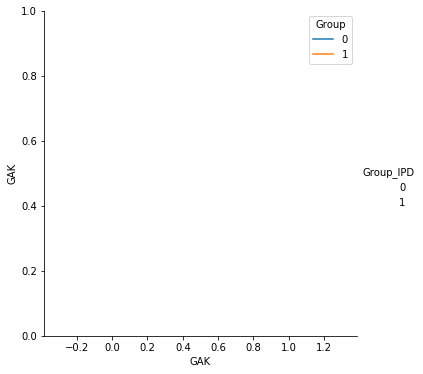

Ks_2sampResult(statistic=0.07500956754688098, pvalue=0.9962062359947114)


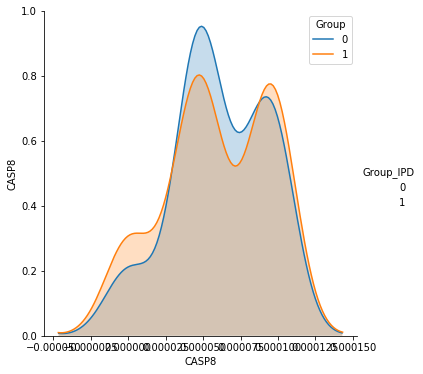

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


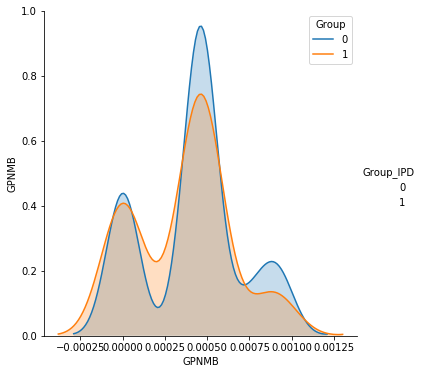

Ks_2sampResult(statistic=0.07500956754688098, pvalue=0.9962062359947114)


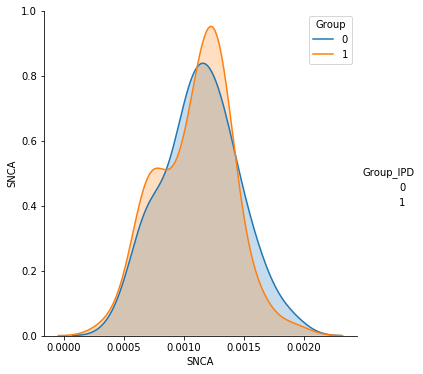

Ks_2sampResult(statistic=0.11557596632223498, pvalue=0.8490860536168324)


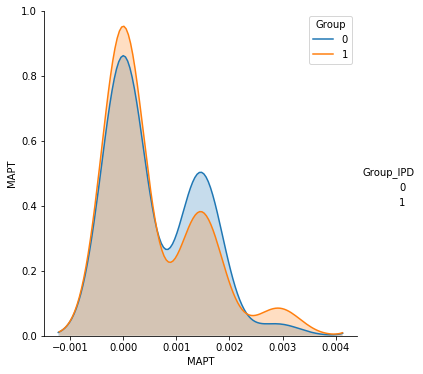

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


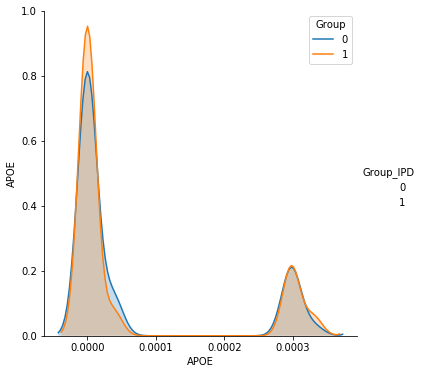

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


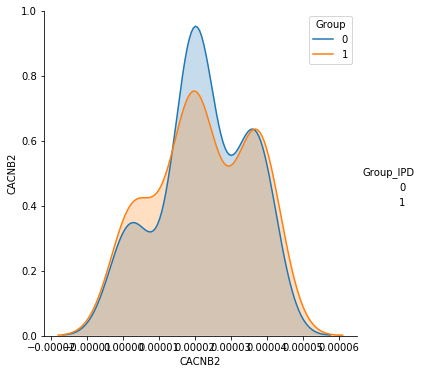

Ks_2sampResult(statistic=0.1251435132032147, pvalue=0.7763151732584617)


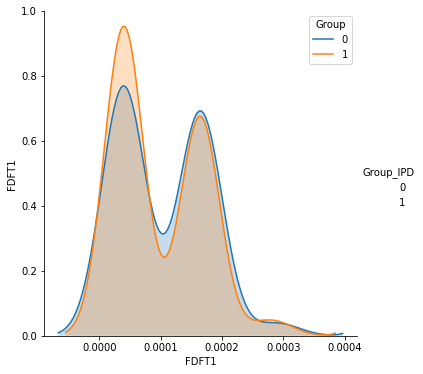

Ks_2sampResult(statistic=0.06926903941829315, pvalue=0.9986949601507721)


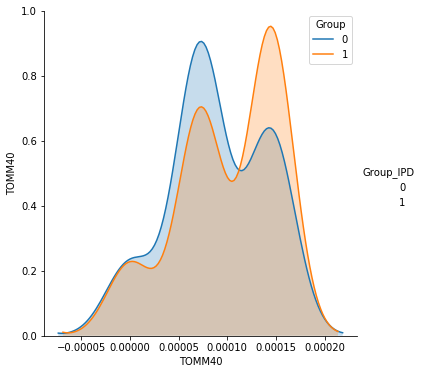

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


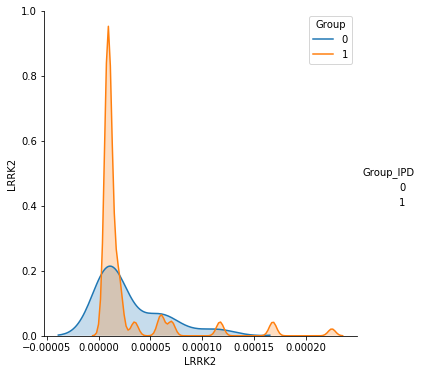

Ks_2sampResult(statistic=0.1584385763490241, pvalue=0.5045260653865571)


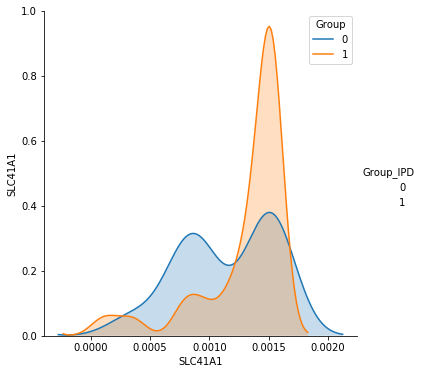

Ks_2sampResult(statistic=0.30807500956754685, pvalue=0.01406692791816122)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


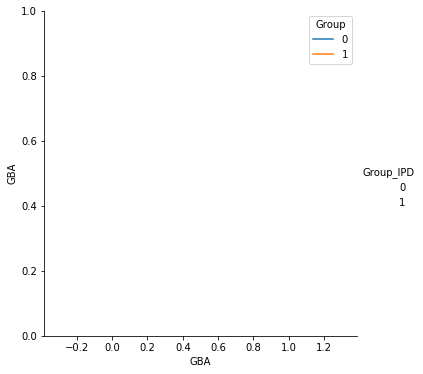

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


In [75]:
for col in group_CADD13_genes.columns:
    if col!="Group_IPD":
        sns.pairplot(group_CADD13_genes[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        plt.legend(title='Group')
        plt.show()
        ks_test=stats.ks_2samp(caddgenes_control[col],caddgenes_sick[col])
        print (ks_test)

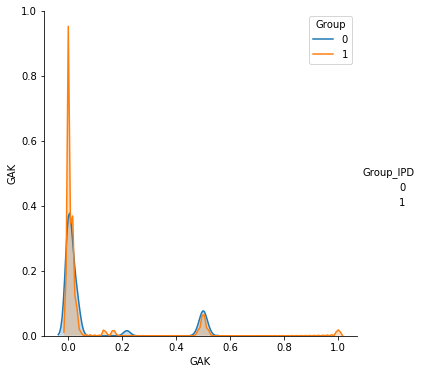

Ks_2sampResult(statistic=0.1285878300803674, pvalue=0.7503591410463927)


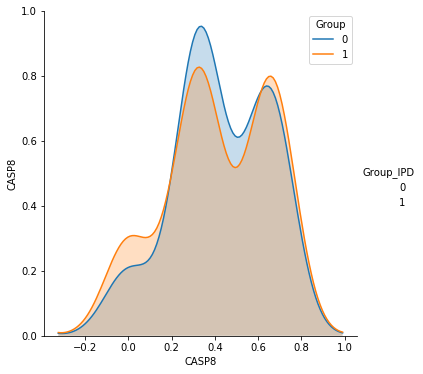

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


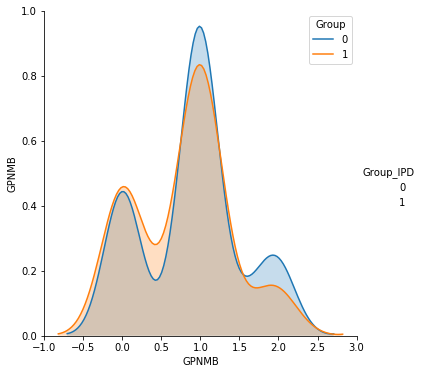

Ks_2sampResult(statistic=0.07500956754688098, pvalue=0.9962062359947114)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


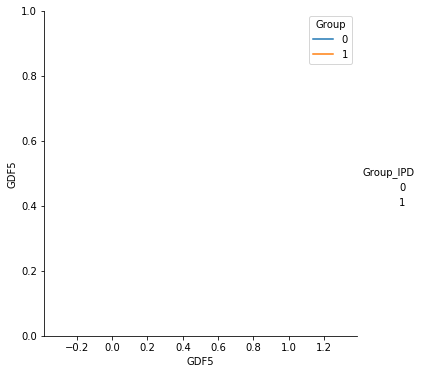

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


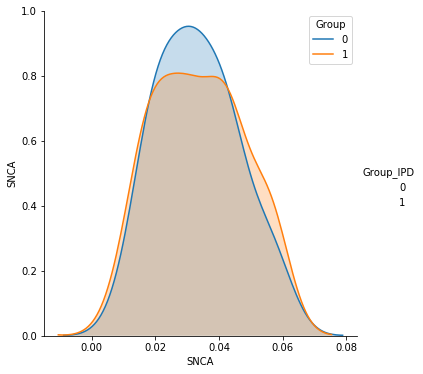

Ks_2sampResult(statistic=0.08495981630309989, pvalue=0.9841448719048109)


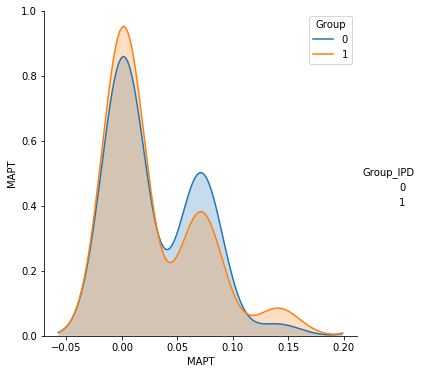

Ks_2sampResult(statistic=0.09070034443168772, pvalue=0.9711168110130289)


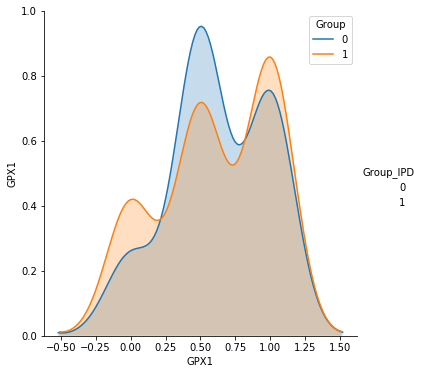

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


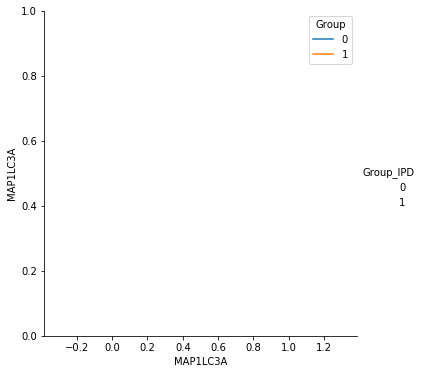

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


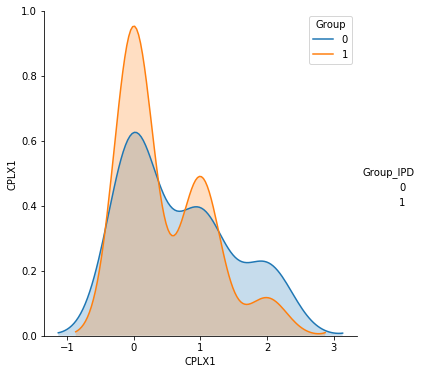

Ks_2sampResult(statistic=0.10486031381553769, pvalue=0.9145260765274282)


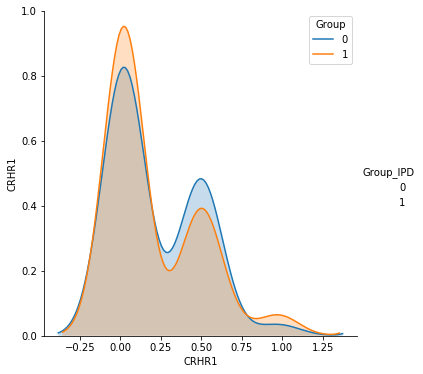

Ks_2sampResult(statistic=0.09031764255644853, pvalue=0.9722761478590156)


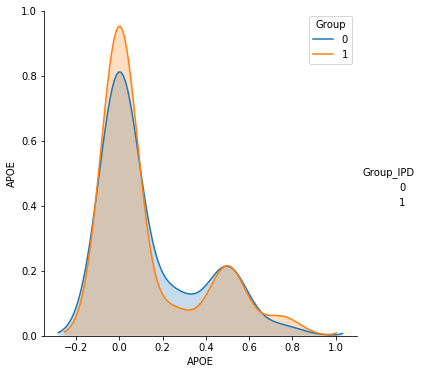

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


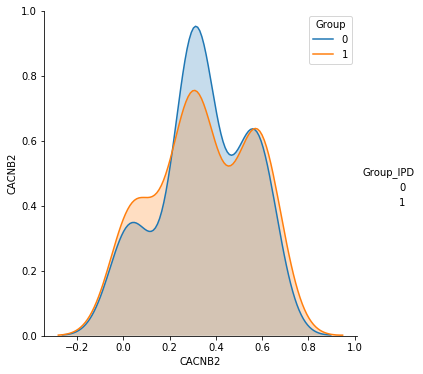

Ks_2sampResult(statistic=0.10830463069269039, pvalue=0.8951052522732157)


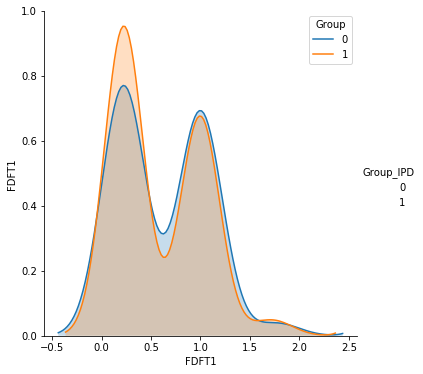

Ks_2sampResult(statistic=0.06926903941829315, pvalue=0.9986949601507721)


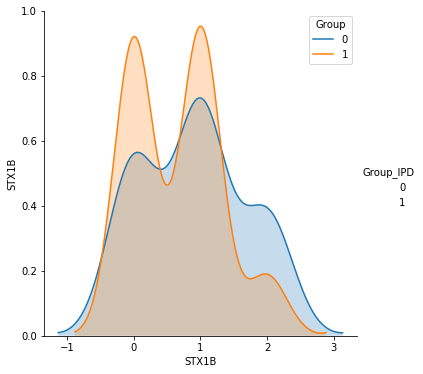

Ks_2sampResult(statistic=0.14121699196326062, pvalue=0.6454149559326265)


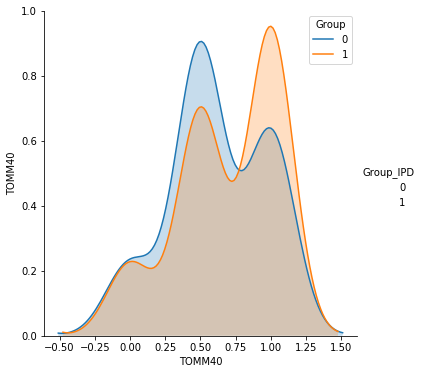

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


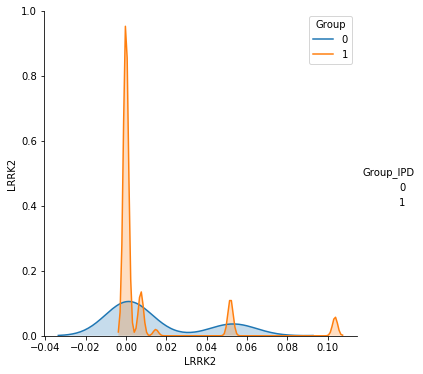

Ks_2sampResult(statistic=0.15652506697282817, pvalue=0.5195511816959282)


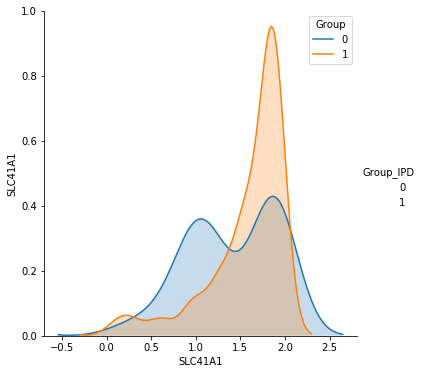

Ks_2sampResult(statistic=0.3038652889399158, pvalue=0.016093748309058298)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


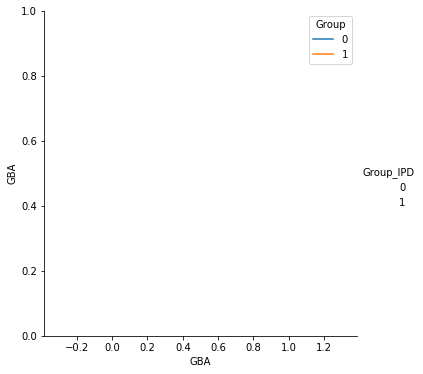

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


In [76]:
for col in group_mut_genes.columns:
    if col!="Group_IPD":
        sns.pairplot(group_mut_genes[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        plt.legend(title='Group')
        plt.show()
        ks_test=stats.ks_2samp(mutgenes_control[col],mutgenes_sick[col])
        print (ks_test)

/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


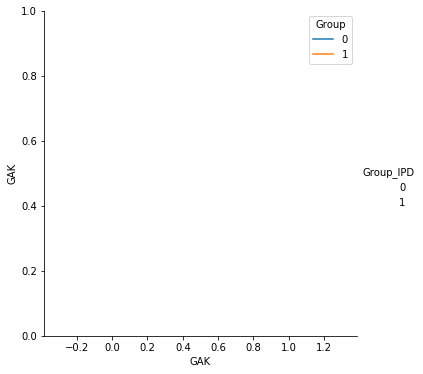

Ks_2sampResult(statistic=0.07500956754688098, pvalue=0.9962062359947114)


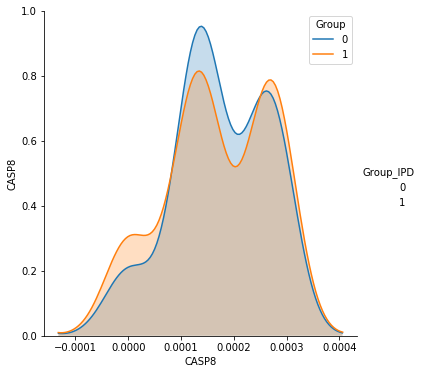

Ks_2sampResult(statistic=0.08075009567546881, pvalue=0.9905715780203432)


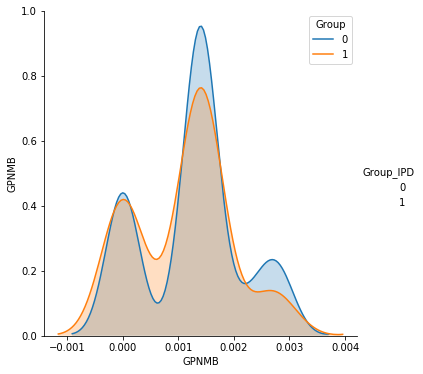

Ks_2sampResult(statistic=0.07500956754688098, pvalue=0.9962062359947114)


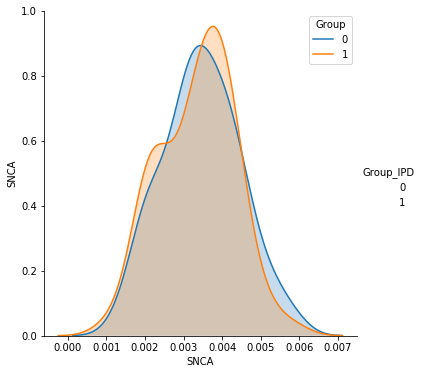

Ks_2sampResult(statistic=0.13050133945656334, pvalue=0.7351337047254487)


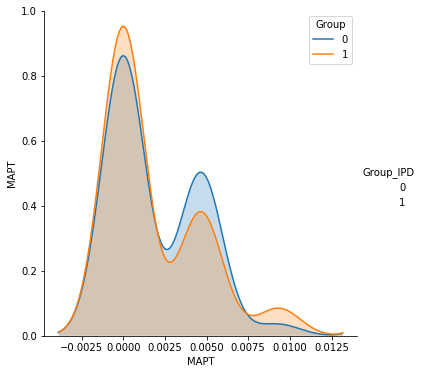

Ks_2sampResult(statistic=0.10753922694221202, pvalue=0.900210359006412)


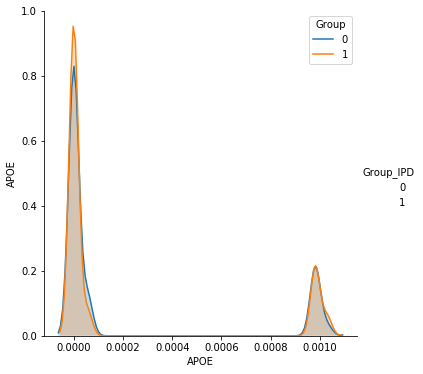

Ks_2sampResult(statistic=0.03903559127439724, pvalue=0.999999999527187)


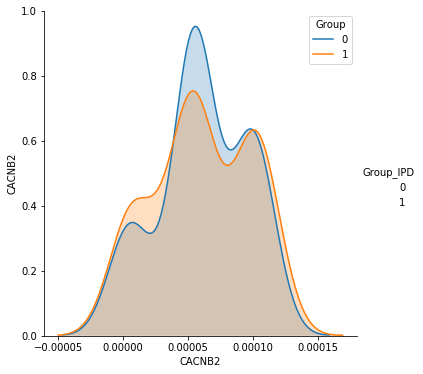

Ks_2sampResult(statistic=0.1251435132032147, pvalue=0.7763151732584617)


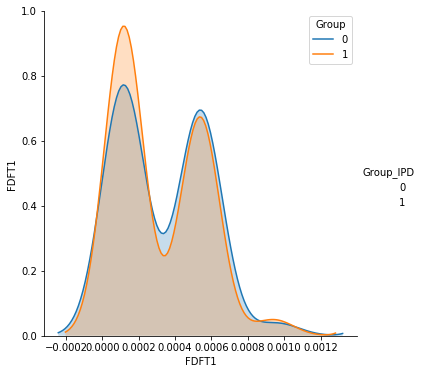

Ks_2sampResult(statistic=0.06926903941829315, pvalue=0.9986949601507721)


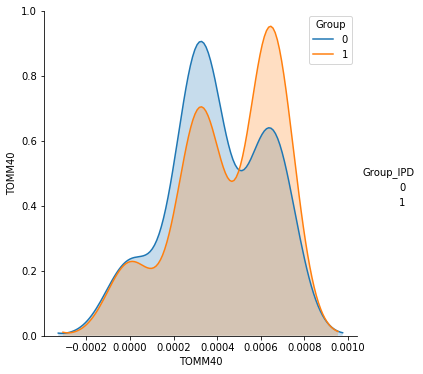

Ks_2sampResult(statistic=0.1484883275928052, pvalue=0.5838313478858543)


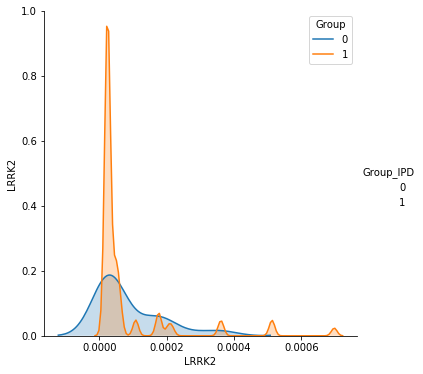

Ks_2sampResult(statistic=0.1584385763490241, pvalue=0.5045260653865571)


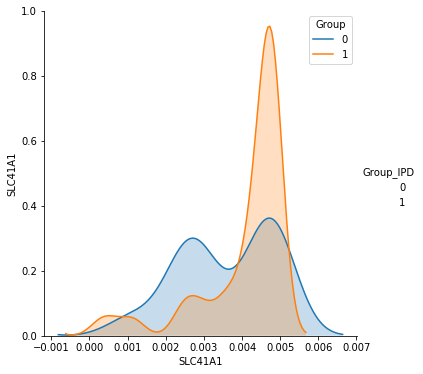

Ks_2sampResult(statistic=0.30807500956754685, pvalue=0.01406692791816122)


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


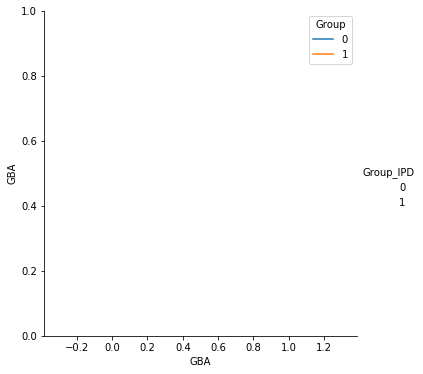

Ks_2sampResult(statistic=0.029850746268656716, pvalue=0.9999999999999998)


In [77]:
for col in group_dann_genes.columns:
    if col!="Group_IPD":
        sns.pairplot(group_dann_genes[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        plt.legend(title='Group')
        plt.show()
        ks_test=stats.ks_2samp(danngenes_control[col],danngenes_sick[col])
        print (ks_test)

In [19]:
####### write output 
data_CADD13_genes.to_csv("../Input_for_Models/Input_MANCOVA/chols_CADD13_genelvl_confs.csv",header=True,index=True)
#
data_dann_genes.to_csv("../Input_for_Models/Input_MANCOVA/chols_dann_genelvl_confs.csv",header=True,index=True)
#
data_mut_genes.to_csv("../Input_for_Models/Input_MANCOVA/chols_mutationalscores_genelvl_confs_new.csv",header=True,index=True)


In [1]:
###################################################################################################################